# Background & Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# Objective

* To predict which customer is more likely to purchase the newly introduced travel package.

# Data Dictionary 

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer
* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [1]:
%%time
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import tree
import scipy.stats as stats


# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV

# EDA

## View the dataset

In [2]:
df = pd.read_csv("Tourism.csv")
data = df.copy() # let us make another copy of data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 4888 rows and 20 columns.


In [3]:
data.head(10) # Exploring initial 10 rows of the data set

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [4]:
np.random.seed(42)  # To get the same random results every time
data.sample(n=20)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
144,200144,0,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
79,200079,0,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2098,202098,0,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
4738,204738,0,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
2858,202858,1,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0
1164,201164,0,40.0,Self Enquiry,1,22.0,Salaried,Female,2,3.0,Standard,3.0,Unmarried,7.0,1,4,1,0.0,Senior Manager,22945.0
787,200787,0,55.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Standard,4.0,Divorced,4.0,0,2,1,1.0,Senior Manager,25976.0
1504,201504,1,24.0,Self Enquiry,1,6.0,Small Business,Male,3,3.0,Basic,3.0,Married,3.0,1,3,0,2.0,Executive,17293.0
287,200287,0,38.0,Self Enquiry,1,29.0,Salaried,Male,2,3.0,Deluxe,3.0,Married,1.0,0,3,0,0.0,Manager,20745.0
4176,204176,0,33.0,Self Enquiry,1,9.0,Large Business,Male,3,5.0,Deluxe,5.0,Single,6.0,0,4,0,2.0,Manager,20854.0


In [5]:
np.random.seed(1)  # To get the same random results every time
data.sample(n=20)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


In [6]:
data.tail(10) # Exploring last 10 rows of the data set

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4878,204878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,3.0,0,4,0,1.0,Manager,24803.0
4879,204879,1,26.0,Self Enquiry,2,27.0,Small Business,Female,4,4.0,Basic,4.0,Married,2.0,1,3,0,2.0,Executive,22347.0
4880,204880,1,59.0,Self Enquiry,1,28.0,Small Business,Female,4,4.0,Deluxe,4.0,Married,6.0,0,3,1,2.0,Manager,28686.0
4881,204881,1,41.0,Self Enquiry,2,25.0,Salaried,Male,3,2.0,Basic,5.0,Married,2.0,0,1,1,2.0,Executive,21065.0
4882,204882,1,37.0,Self Enquiry,2,20.0,Salaried,Male,3,5.0,Basic,5.0,Married,6.0,1,5,1,2.0,Executive,23317.0
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [8]:
data[data.duplicated()].count() # Find out duplicates in the data set

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

***Observations***
- There are no duplicate entries.

In [9]:
data.drop(["CustomerID"],axis=1,inplace=True) # Remove CustomerID column and use python #no. ; inplace means no make copy

In [10]:
cat_cols=['ProdTaken','TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups','ProductPitched','PreferredPropertyStar','MaritalStatus','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
------------------------------
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
3.0    2993
5.0     

***Observations***
- Gender has an error in the form of Fe Male as a unique value.
- Single and Unmarried can be both considered Single.

In [11]:
data["Gender"] = data["Gender"].str.replace("Fe Male","Female")
print(data["Gender"].value_counts())

Male      2916
Female    1972
Name: Gender, dtype: int64


***Observations***
- Gender error corrected.

In [12]:
data["MaritalStatus"] = data["MaritalStatus"].str.replace("Unmarried","Single")
print(data["MaritalStatus"].value_counts())

Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64


***Observations***
- Single and Unmarried are merged as Single.

In [13]:
# Check the unique value counts in each column of the dataframe.
data.nunique()

ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         2
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  3
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [15]:
data["ProdTaken"] = data["ProdTaken"].astype("category")
data["TypeofContact"] = data["TypeofContact"].astype("category")
data["Occupation"] = data["Occupation"].astype("category")
data["Gender"] = data["Gender"].astype("category")
data["ProductPitched"] = data["ProductPitched"].astype("category")
data["MaritalStatus"] = data["MaritalStatus"].astype("category")
data["Passport"] = data["Passport"].astype("category")
data["OwnCar"] = data["OwnCar"].astype("category")
data["Designation"] = data["Designation"].astype("category")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

***Observations***
- Nan values may be found in Age , TypeofContact , DurationOfPitch , NumberOfFollowups , PreferredPropertyStar , NumberOfTrips , NumberOfChildrenVisiting , MonthlyIncome. 

In [17]:
data.isnull().values.any() # If there are any null or missing values in data set; 

# Pandas will recognize both empty cells and “NA” types as missing values
# To detect NaN values numpy uses np.isnan().
# To detect NaN values pandas uses either .isna() or .isnull().
# The NaN values are inherited from the fact that pandas is built on top of numpy, 
# while the two functions' names originate from R's DataFrames, whose structure and functionality pandas tried to mimic.

True

## Preliminary Data Fixing - Check for and fix missing values

In [18]:
# looking at which columns have missing values
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

***Observations***
- Missing numeric values can be filled with median (real) values.

In [19]:
# we will replace missing values in these columns with its medain
medianFiller = lambda x: x.fillna(x.median())
NaNcolumns = ['DurationOfPitch','MonthlyIncome','Age','NumberOfTrips','NumberOfChildrenVisiting','NumberOfFollowups','PreferredPropertyStar']
print (NaNcolumns)

['DurationOfPitch', 'MonthlyIncome', 'Age', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'NumberOfFollowups', 'PreferredPropertyStar']


In [20]:
data[NaNcolumns] = data[NaNcolumns].apply(medianFiller,axis=0) # apply the lamda function on NaNcolumns for missing values

In [21]:
# looking at which columns have missing values
data.isnull().sum().sort_values(ascending=False)

TypeofContact               25
MonthlyIncome                0
NumberOfFollowups            0
Age                          0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
ProductPitched               0
Designation                  0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
ProdTaken                    0
dtype: int64

In [22]:
# Remove the rows of data which have missing value(s)
data= data.dropna() 
# Remove for TypeofContact missing values as it is a '0' or '1' and no median possibility
# TypeofContact missing values are only 25, ~ 0.5% of rows so impact is negligible

In [23]:
data.isnull().values.any() # If there are any null or missing values in data set; 

False

***Observations***
- Missing values are treated.

In [24]:
# New dataframe shape
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 4863 rows and 19 columns.


## Summary of the dataset

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4863 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4863 non-null   category
 1   Age                       4863 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4863 non-null   int64   
 4   DurationOfPitch           4863 non-null   float64 
 5   Occupation                4863 non-null   category
 6   Gender                    4863 non-null   category
 7   NumberOfPersonVisiting    4863 non-null   int64   
 8   NumberOfFollowups         4863 non-null   float64 
 9   ProductPitched            4863 non-null   category
 10  PreferredPropertyStar     4863 non-null   float64 
 11  MaritalStatus             4863 non-null   category
 12  NumberOfTrips             4863 non-null   float64 
 13  Passport                  4863 non-null   catego

In [26]:
#data.describe(include='all').T # View summary of dataset
data.describe().T # View summary of dataset numerical variables

,count,mean,std,min,25%,50%,75%,max
Age,4863.0,37.585647,9.104766,18.0,31.0,36.0,43.0,61.0
CityTier,4863.0,1.654329,0.916498,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4863.0,15.375077,8.335788,5.0,9.0,13.0,19.0,127.0
NumberOfPersonVisiting,4863.0,2.908081,0.724762,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4863.0,3.713346,0.996539,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4863.0,3.578655,0.796907,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4863.0,3.231339,1.822589,1.0,2.0,3.0,4.0,22.0
PitchSatisfactionScore,4863.0,3.079581,1.366446,1.0,2.0,3.0,4.0,5.0
NumberOfChildrenVisiting,4863.0,1.187744,0.852271,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4863.0,23565.411063,5270.642955,1000.0,20479.0,22347.0,25447.5,98678.0


**Observations**
* Age mean and median is 37.59 and 36 respectively which indicates a roughly normal distribution.
* City Tier mean of CityTier is 1.65 vs median of 1.0 indicating while there are customers from Tier 2 and 3 cities, most are from Tier 1.
* DurationOfPitch mean is 15.38 while median is 13.0 indicating more pitches are under 15.38 with some extreme of 127.0, indicating possible outliers.
* NumberOfPersonVisiting mean and median is 2.91 and 3.0 respectively which indicates a roughly normal distribution.
* NumberOfFollowups mean and median is 3.71 vs 4.0 indicating a slight left skewed meaning more follow ups are 4.0 and above.
* PreferredPropertyStar mean and median is 3.58 vs 3.0 indicating more preferred hotel rating of 3 stars over 4 and 5 stars.
* NumberOfTrips mean and median is 3.23	vs 3.0 indicating more number of trips are 3.0 and below with extreme of 22.0 indicating outliers.
* PitchSatisfactionScore mean and median is 3.08 vs 3.0 which indicates a roughly normal distribution.
* NumberOfChildrenVisiting mean and median is 1.187744	vs 1.0 indicating more number 1.0 or below.
* MonthlyIncome mean and median is 23565.41 vs 22347 indicating more with income less than 23565.41.

In [27]:
data.describe(include=['category']).T # View summary of dataset categorical variables

,count,unique,top,freq
ProdTaken,4863,2,0,3946
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4863,4,Salaried,2363
Gender,4863,2,Male,2901
ProductPitched,4863,5,Basic,1832
MaritalStatus,4863,3,Married,2325
Passport,4863,2,0,3441
OwnCar,4863,2,1,3018
Designation,4863,5,Executive,1832


**Observations**
* 81.1% of the customers in the dataset did not take the package.
* 70.8% of the customers are self enquired.
* 48.6% of customers are salaried and they form the biggest occupation type of all customers.
* 59.7% of customers are male.
* 37.7% of customers were pitched the Basic package which is the most frequent.
* 47.8% of customers are married and they form the biggest marital status type of all customers.
* 70.8% of customers do not have a passport.
* 62.1% of cusotmers own cars.
* 37.7% of customers are executives and they form the biggest designation type of all customers.

## Univariate Analysis

In [28]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(7,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [29]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4863 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4863 non-null   category
 1   Age                       4863 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4863 non-null   int64   
 4   DurationOfPitch           4863 non-null   float64 
 5   Occupation                4863 non-null   category
 6   Gender                    4863 non-null   category
 7   NumberOfPersonVisiting    4863 non-null   int64   
 8   NumberOfFollowups         4863 non-null   float64 
 9   ProductPitched            4863 non-null   category
 10  PreferredPropertyStar     4863 non-null   float64 
 11  MaritalStatus             4863 non-null   category
 12  NumberOfTrips             4863 non-null   float64 
 13  Passport                  4863 non-null   catego

### Observations on Age (Start of Numerical Variables Analysis)

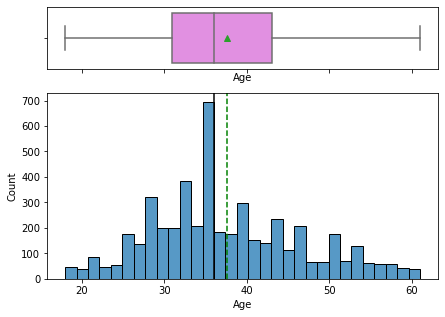

In [31]:
histogram_boxplot(data["Age"])

- The distribution of age is normal and no outliers.
- A significant number of customers are aged around 36.

### Observations on CityTier 

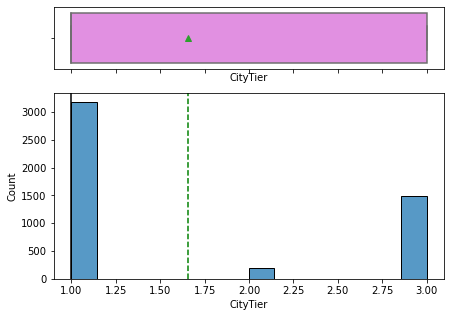

In [32]:
histogram_boxplot(data["CityTier"])

In [33]:
print(data["CityTier"].value_counts())

1    3173
3    1492
2     198
Name: CityTier, dtype: int64


- A vast majority of customers come from firstly Tier 1 (3173 / 65.25%) then Tier 3 (1492 / 30.68%) cities.

### Observations on DurationOfPitch

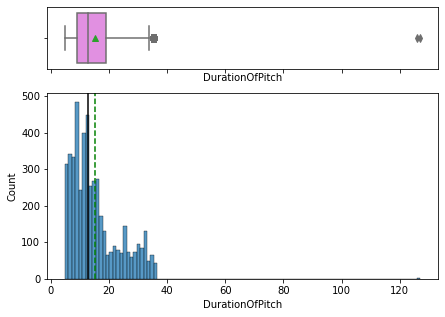

In [34]:
histogram_boxplot(data["DurationOfPitch"])

- A vast majority of customers pitch duration are below 15 with low number of outliers indicating extremely long pitch duration.

### Observations on NumberOfPersonVisiting

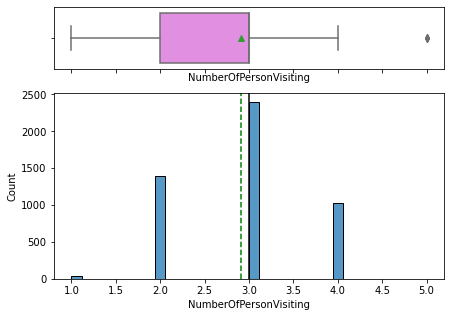

In [35]:
histogram_boxplot(data["NumberOfPersonVisiting"])

In [36]:
print(data["NumberOfPersonVisiting"].value_counts())

3    2394
2    1401
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64


- A majority of customers have 3 people on the trip with them followed by 2 then 4 with some outliers at 5.

### Observations on NumberOfFollowups

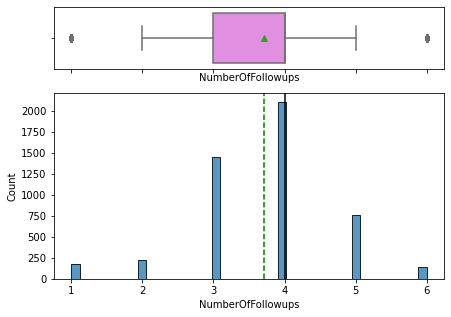

In [37]:
histogram_boxplot(data["NumberOfFollowups"])

In [38]:
print(data["NumberOfFollowups"].value_counts())

4.0    2106
3.0    1456
5.0     764
2.0     229
1.0     172
6.0     136
Name: NumberOfFollowups, dtype: int64


- A majority of follow ups are 4 times followed by 3 times with outliers at 1 followup and 6 follow ups.

### Observations on PreferredPropertyStar

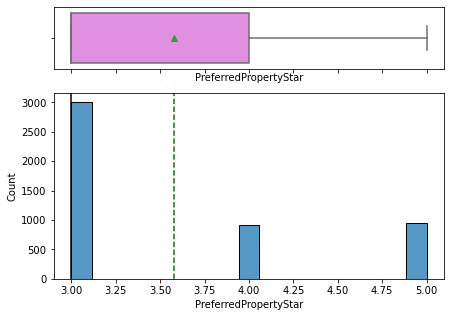

In [39]:
histogram_boxplot(data["PreferredPropertyStar"])

In [40]:
print(data["PreferredPropertyStar"].value_counts())

3.0    3000
5.0     951
4.0     912
Name: PreferredPropertyStar, dtype: int64


- A majority of customers preferred a 3 star to 4 or 5 star ratings hotel property.

### Observations on NumberOfTrips

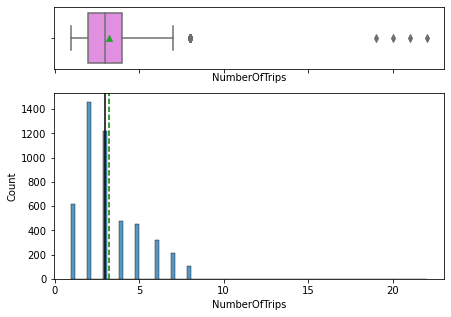

In [41]:
histogram_boxplot(data["NumberOfTrips"])

In [42]:
print(data["NumberOfTrips"].value_counts())

2.0     1456
3.0     1216
1.0      614
4.0      475
5.0      456
6.0      321
7.0      216
8.0      105
21.0       1
19.0       1
22.0       1
20.0       1
Name: NumberOfTrips, dtype: int64


- A majority of trip numbers are 3 and below with a small number of outliers indicating a significantly higher number of trips. 

### Observations on PitchSatisfactionScore

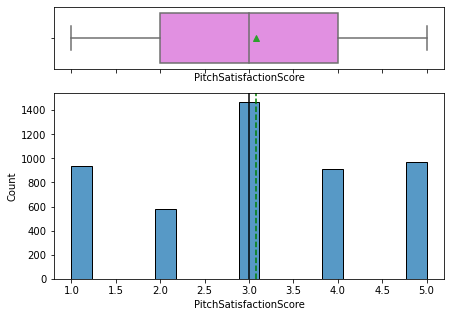

In [43]:
histogram_boxplot(data["PitchSatisfactionScore"])

In [44]:
print(data["PitchSatisfactionScore"].value_counts())

3    1466
5     967
1     937
4     910
2     583
Name: PitchSatisfactionScore, dtype: int64


- Most pitch satisfaction ratings are 3.0 / 5.0. 

### Observations on NumberOfChildrenVisiting

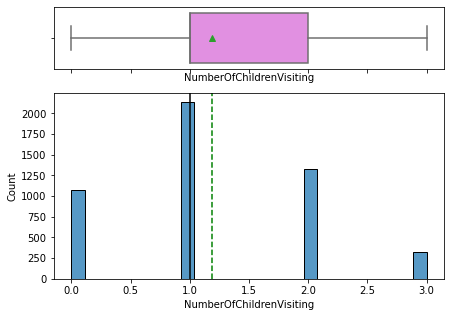

In [45]:
histogram_boxplot(data["NumberOfChildrenVisiting"])

In [46]:
print(data["NumberOfChildrenVisiting"].value_counts())

1.0    2135
2.0    1333
0.0    1070
3.0     325
Name: NumberOfChildrenVisiting, dtype: int64


- Most customers have up to 2 children on the trip with 1 child being the most common. 

### Observations on MonthlyIncome

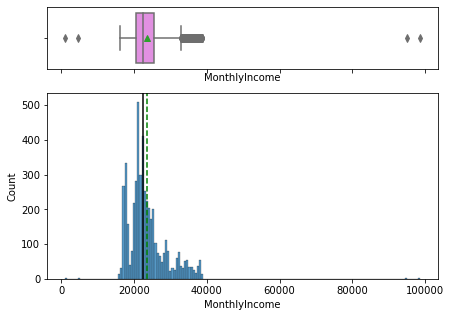

In [47]:
histogram_boxplot(data["MonthlyIncome"])

- Most customers have monthly income around 24K with a small number of outliers of significantly higher income customers. 

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4863 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4863 non-null   category
 1   Age                       4863 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4863 non-null   int64   
 4   DurationOfPitch           4863 non-null   float64 
 5   Occupation                4863 non-null   category
 6   Gender                    4863 non-null   category
 7   NumberOfPersonVisiting    4863 non-null   int64   
 8   NumberOfFollowups         4863 non-null   float64 
 9   ProductPitched            4863 non-null   category
 10  PreferredPropertyStar     4863 non-null   float64 
 11  MaritalStatus             4863 non-null   category
 12  NumberOfTrips             4863 non-null   float64 
 13  Passport                  4863 non-null   catego

### Observations on ProdTaken( Start of Categorical Variables Analysis)

In [49]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

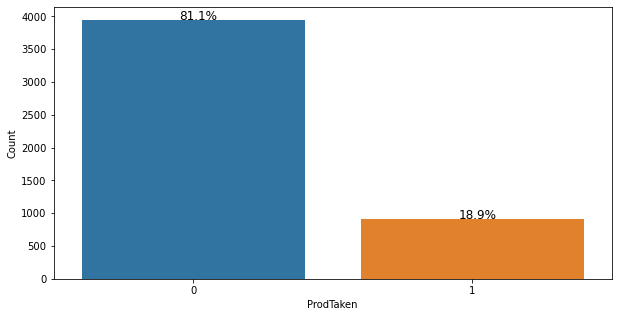

In [50]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["ProdTaken"], order = data["ProdTaken"].value_counts().index) # Plot histogram
plt.xlabel('ProdTaken')
plt.ylabel('Count')
perc_on_bar(ax,data["ProdTaken"])

- 18.9% of customers in dataset took the package while vast majority at 81.1% did not.

### Observations on TypeofContact

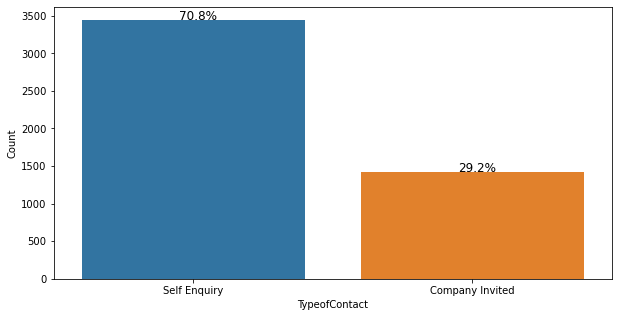

In [51]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["TypeofContact"], order = data["TypeofContact"].value_counts().index) # Plot histogram
plt.xlabel('TypeofContact')
plt.ylabel('Count')
perc_on_bar(ax,data["TypeofContact"])

- Most customers at 70.8% self enquired to contact the company.

### Observations on Occupation

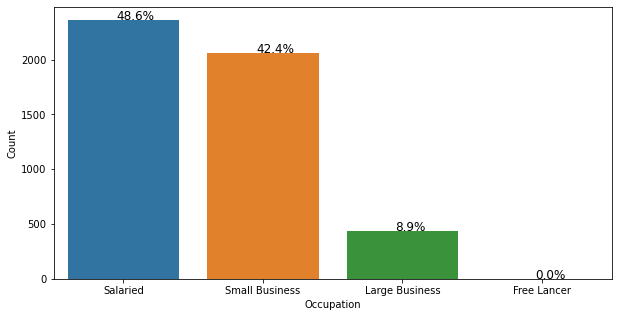

In [52]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["Occupation"], order = data["Occupation"].value_counts().index) # Plot histogram
plt.xlabel('Occupation')
plt.ylabel('Count')
perc_on_bar(ax,data["Occupation"])

- Most customers are salaried employees followed by small business. 

### Observations on Gender

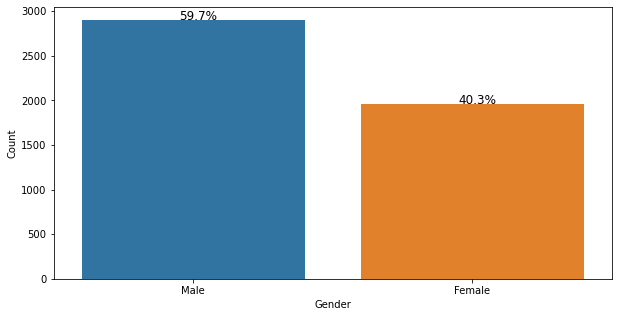

In [53]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["Gender"], order = data["Gender"].value_counts().index) # Plot histogram
plt.xlabel('Gender')
plt.ylabel('Count')
perc_on_bar(ax,data["Gender"])

- More customers are male at 59.7%.

### Observations on ProductPitched

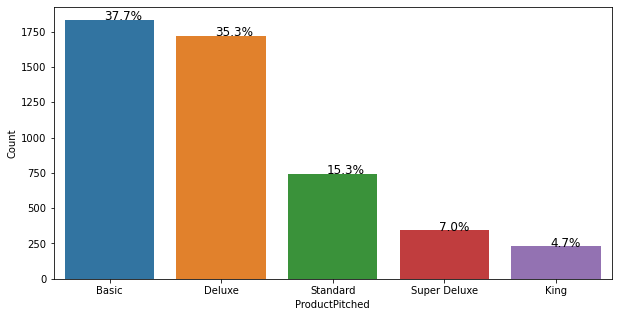

In [54]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["ProductPitched"], order = data["ProductPitched"].value_counts().index) # Plot histogram
plt.xlabel('ProductPitched')
plt.ylabel('Count')
perc_on_bar(ax,data["ProductPitched"])

- Most product packages pitched were Basic and Deluxe packages.

### Observations on MaritalStatus

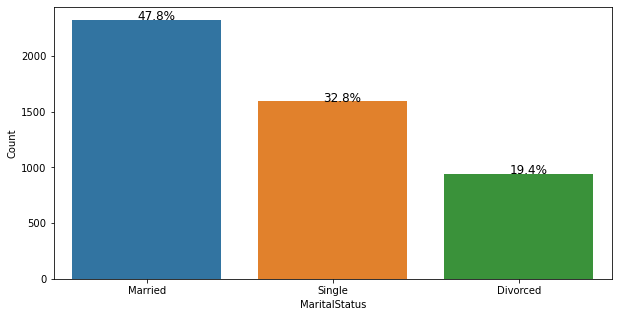

In [55]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["MaritalStatus"], order = data["MaritalStatus"].value_counts().index) # Plot histogram
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
perc_on_bar(ax,data["MaritalStatus"])

- Most customers are married followed by singles.

### Observations on Passport

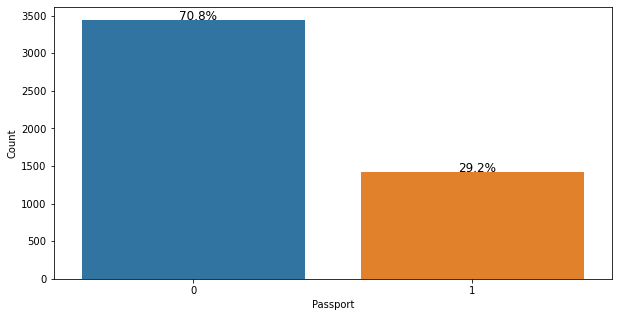

In [56]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["Passport"], order = data["Passport"].value_counts().index) # Plot histogram
plt.xlabel('Passport')
plt.ylabel('Count')
perc_on_bar(ax,data["Passport"])

- Most customers at 70.8% do not have a passport.

### Observations on OwnCar

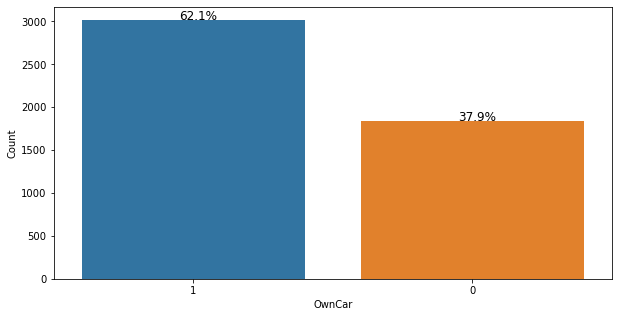

In [57]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["OwnCar"], order = data["OwnCar"].value_counts().index) # Plot histogram
plt.xlabel('OwnCar')
plt.ylabel('Count')
perc_on_bar(ax,data["OwnCar"])

- Most customers at 62.1% own a car.

### Observations on Designation

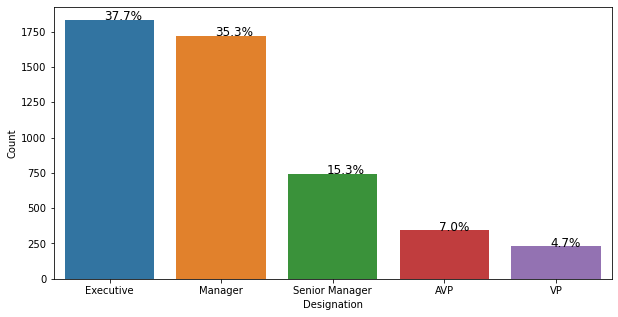

In [58]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data["Designation"], order = data["Designation"].value_counts().index) # Plot histogram
plt.xlabel('Designation')
plt.ylabel('Count')
perc_on_bar(ax,data["Designation"])

- Most customers are executives or managers to senior managers.

## Bivariate Analysis

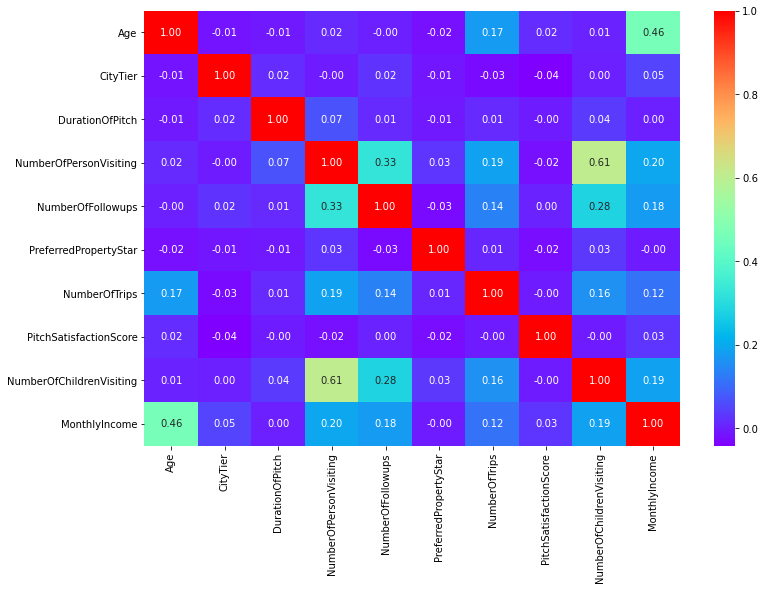

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

**Observations**
- NumberOfPersonVisiting and NumberOfChildrenVisiting seemed to be mildly positively correlated as both indicate the number travelling with the customer.
- There does not seem to be any other correlation among numeric variables thus some variables can be converted to categorical: 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting'

In [60]:
data["CityTier"] = data["CityTier"].astype("category")
data["NumberOfPersonVisiting"] = data["NumberOfPersonVisiting"].astype("category")
data["NumberOfFollowups"] = data["NumberOfFollowups"].astype("category")
data["PreferredPropertyStar"] = data["PreferredPropertyStar"].astype("category")
data["PitchSatisfactionScore"] = data["PitchSatisfactionScore"].astype("category")
data["NumberOfChildrenVisiting"] = data["NumberOfChildrenVisiting"].astype("category")

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4863 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4863 non-null   category
 1   Age                       4863 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4863 non-null   category
 4   DurationOfPitch           4863 non-null   float64 
 5   Occupation                4863 non-null   category
 6   Gender                    4863 non-null   category
 7   NumberOfPersonVisiting    4863 non-null   category
 8   NumberOfFollowups         4863 non-null   category
 9   ProductPitched            4863 non-null   category
 10  PreferredPropertyStar     4863 non-null   category
 11  MaritalStatus             4863 non-null   category
 12  NumberOfTrips             4863 non-null   float64 
 13  Passport                  4863 non-null   catego

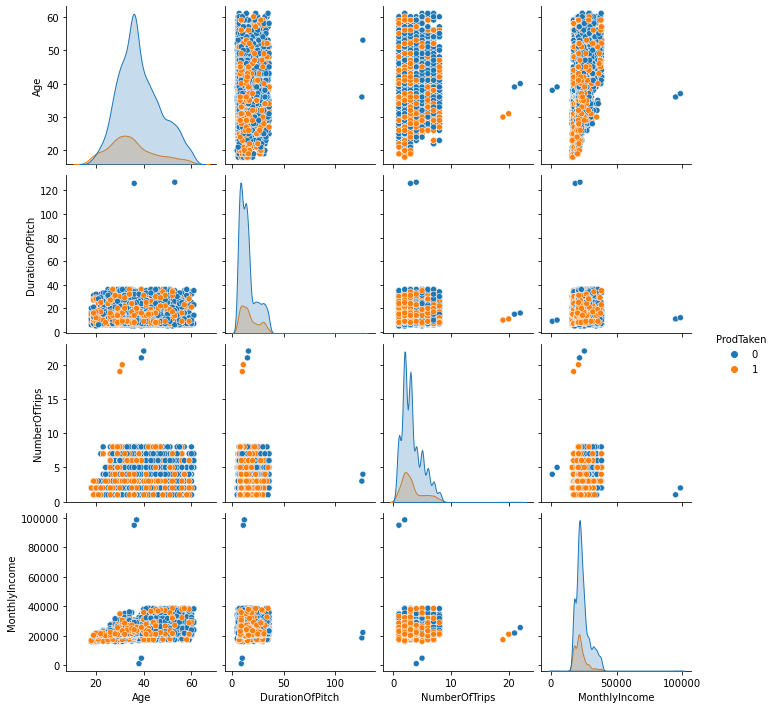

In [62]:
sns.pairplot(data,diag_kind='kde',vars=["Age","DurationOfPitch","NumberOfTrips","MonthlyIncome"], hue="ProdTaken")

**Observations**
- There does not seem to be any discernible pattern in the remaining numeric variables.

### Observations on ProdTaken vs Numeric Values

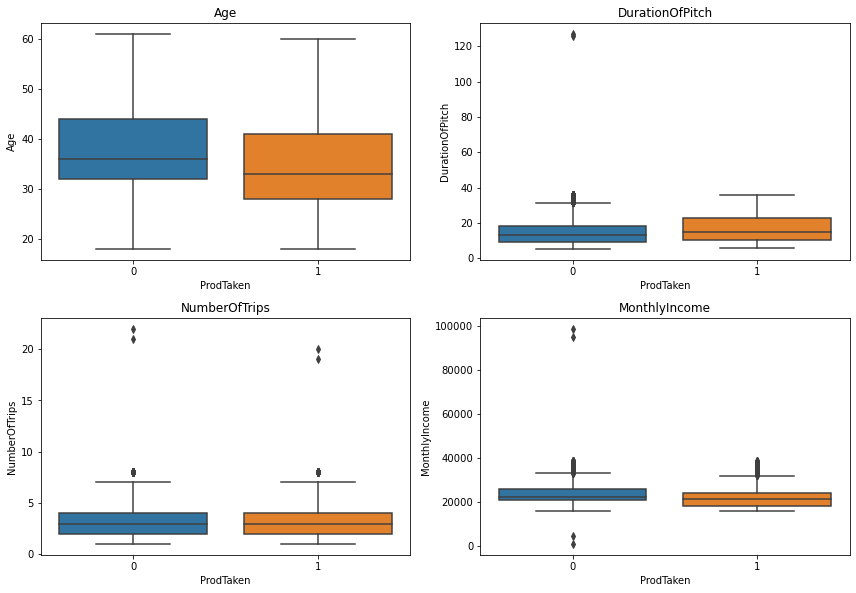

In [63]:
cols = data[['Age','DurationOfPitch','NumberOfTrips', 'MonthlyIncome']].columns.tolist()
plt.figure(figsize=(12,12))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["ProdTaken"],data[variable])#,palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- Age median and distribution from 25th to 75th percentile of package taking customers are lower than non-package taking customers. The age range of customers taking up packages is between ~ 28 to just above 40.
- DurationOfPitch median and distribution are rather similar between package and non package takers with non package takers registering a number of outliers with higher pitch durations. Package takers have a marginally higher median and distribution.
- NumberOfTrips, for customer number of trips in a year, median and distribution are rather similar between package and non package takers with both registering a number of outliers on the higher end of number of trips.
- Monthly Income median and distribution are rather similar between package and non package takers with both registering a number of outliers. Non Package takers have a marginally higher median and distribution as well as lower end and much higher end outliers in monthly income.

In [64]:
## Function to plot stacked bar chart

def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["ProdTaken"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["ProdTaken"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    # plt.legend(loc='lower left', frameon=False)
    # plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4863 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4863 non-null   category
 1   Age                       4863 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4863 non-null   category
 4   DurationOfPitch           4863 non-null   float64 
 5   Occupation                4863 non-null   category
 6   Gender                    4863 non-null   category
 7   NumberOfPersonVisiting    4863 non-null   category
 8   NumberOfFollowups         4863 non-null   category
 9   ProductPitched            4863 non-null   category
 10  PreferredPropertyStar     4863 non-null   category
 11  MaritalStatus             4863 non-null   category
 12  NumberOfTrips             4863 non-null   float64 
 13  Passport                  4863 non-null   catego

### Observations on ProdTaken vs TypeofContact

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2837  607  3444
All              3946  917  4863
------------------------------------------------------------------------------------------------------------------------


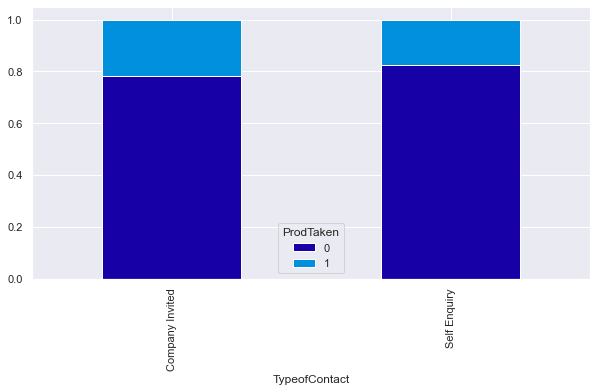

In [66]:
stacked_plot(data["TypeofContact"])

- Company invited customers are slightly more likely to take up of a package. 

### Observations on ProdTaken vs CityTier

ProdTaken     0    1   All
CityTier                  
1          2655  518  3173
2           152   46   198
3          1139  353  1492
All        3946  917  4863
------------------------------------------------------------------------------------------------------------------------


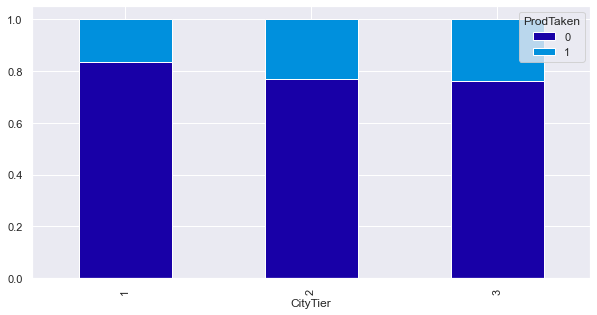

In [67]:
stacked_plot(data["CityTier"])

- Tier 2 and 3 resident customers are slightly more likely to take up a package than Tier 1 residents.

### Observations on ProdTaken vs Occupation

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1950  413  2363
Small Business  1682  382  2064
All             3946  917  4863
------------------------------------------------------------------------------------------------------------------------


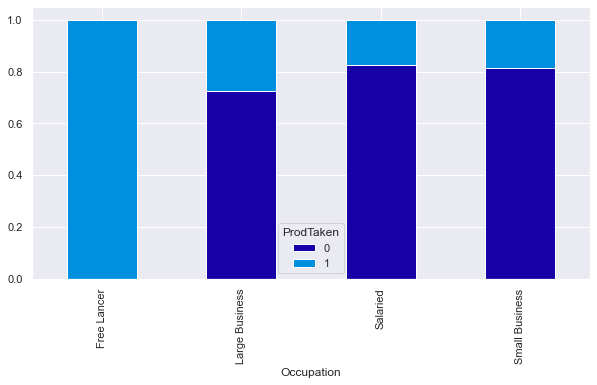

In [68]:
stacked_plot(data["Occupation"])

- Free Lancers are very much likely to take up a package followed by Large Business customers. However this might not be statistically significant given that there are only 2 freelancers in the data set.

### Observations on ProdTaken vs Gender

ProdTaken     0    1   All
Gender                    
Female     1620  342  1962
Male       2326  575  2901
All        3946  917  4863
------------------------------------------------------------------------------------------------------------------------


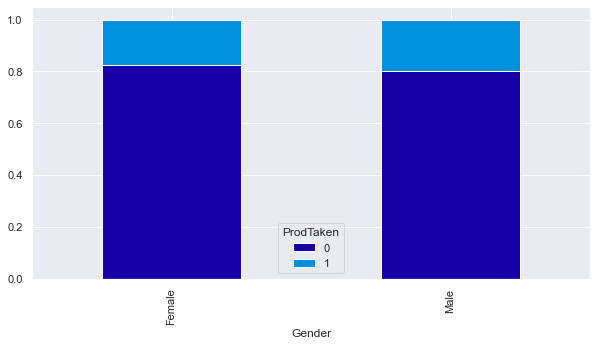

In [69]:
stacked_plot(data["Gender"])

- There is no discernible difference in either gender of customers to determine a higher take up of a package. 

### Observations on ProdTaken vs NumberOfPersonVisiting

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1136  265  1401
3                       1935  459  2394
4                        833  193  1026
5                          3    0     3
All                     3946  917  4863
------------------------------------------------------------------------------------------------------------------------


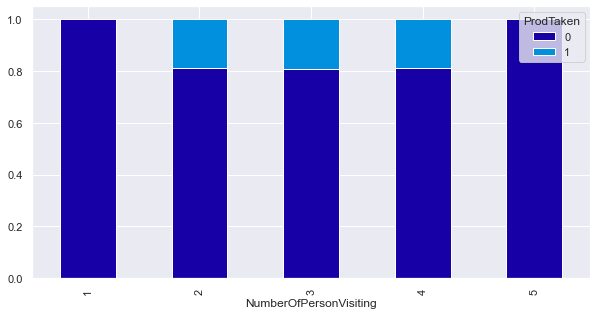

In [70]:
stacked_plot(data["NumberOfPersonVisiting"])

- 2 to 4 travel companions with the customer are more likely to take up a package.

### Observations on ProdTaken vs NumberOfFollowups

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 152   20   172
2.0                 205   24   229
3.0                1214  242  1456
4.0                1720  386  2106
5.0                 573  191   764
6.0                  82   54   136
All                3946  917  4863
------------------------------------------------------------------------------------------------------------------------


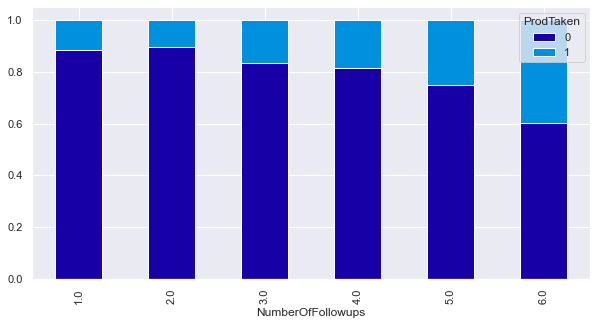

In [71]:
stacked_plot(data["NumberOfFollowups"])

- Among customers, a higher number of follow ups to customers will lead to higher success rate to take up a package.

### Observations on ProdTaken vs ProductPitched

ProdTaken          0    1   All
ProductPitched                 
Basic           1283  549  1832
Deluxe          1513  204  1717
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3946  917  4863
------------------------------------------------------------------------------------------------------------------------


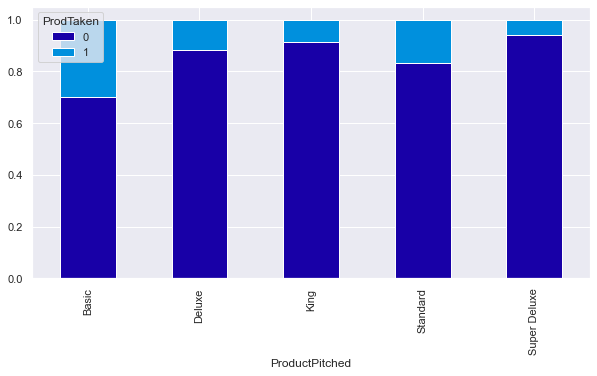

In [72]:
stacked_plot(data["ProductPitched"])

- Basic followed by Standard then Deluxe packages have higher success rate of take up when pitched to customers.

### Observations on ProdTaken vs PreferredPropertyStar

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2514  486  3000
4.0                     730  182   912
5.0                     702  249   951
All                    3946  917  4863
------------------------------------------------------------------------------------------------------------------------


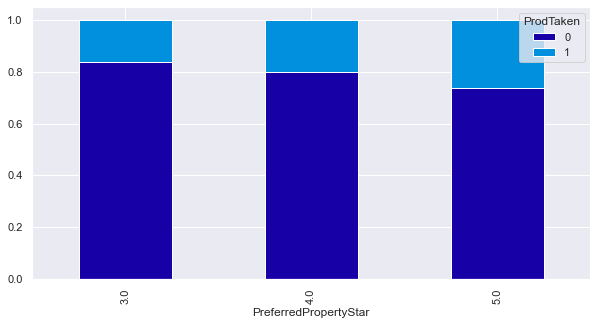

In [73]:
stacked_plot(data["PreferredPropertyStar"])

- 5 star hotel preferred customers are more likely to take up a package.

### Observations on ProdTaken vs MaritalStatus

ProdTaken         0    1   All
MaritalStatus                 
Divorced        821  123   944
Married        1999  326  2325
Single         1126  468  1594
All            3946  917  4863
------------------------------------------------------------------------------------------------------------------------


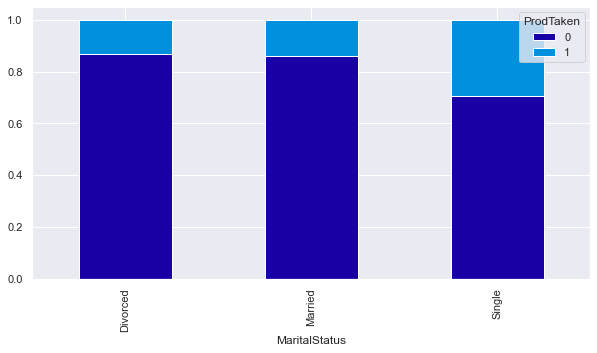

In [74]:
stacked_plot(data["MaritalStatus"])

- Singles are much more likely to pick up a package.

### Observations on ProdTaken vs Passport

ProdTaken     0    1   All
Passport                  
0          3018  423  3441
1           928  494  1422
All        3946  917  4863
------------------------------------------------------------------------------------------------------------------------


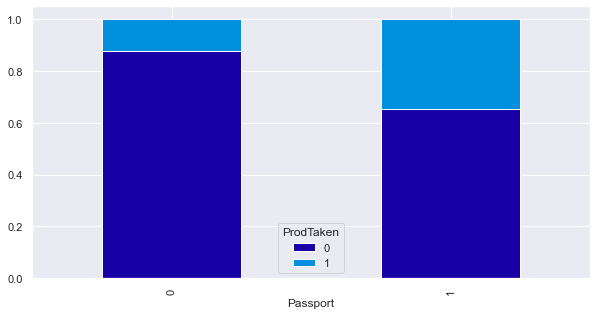

In [75]:
stacked_plot(data["Passport"])

- Customers with passports are much more likely to pick up a package.

### Observations on ProdTaken vs PitchSatisfactionScore

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        794  143   937
2                        495   88   583
3                       1152  314  1466
4                        748  162   910
5                        757  210   967
All                     3946  917  4863
------------------------------------------------------------------------------------------------------------------------


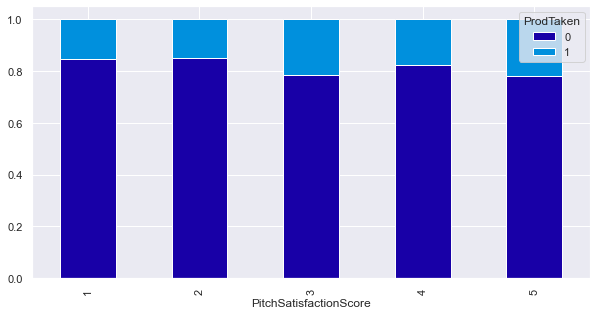

In [76]:
stacked_plot(data["PitchSatisfactionScore"])

- Customers who rated 3.0 or more for pitch satisfaction are more likely to pick up a package.

### Observations on ProdTaken vs OwnCar

ProdTaken     0    1   All
OwnCar                    
0          1486  359  1845
1          2460  558  3018
All        3946  917  4863
------------------------------------------------------------------------------------------------------------------------


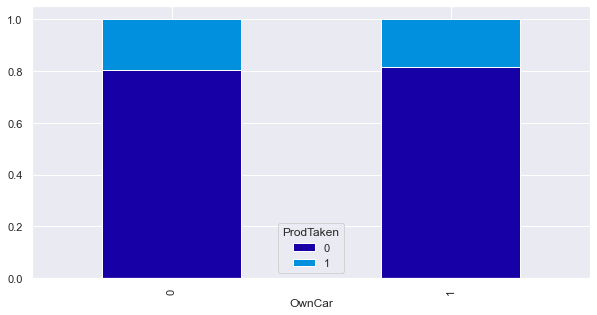

In [77]:
stacked_plot(data["OwnCar"])

- There is no discernible difference in either owning or not owning a car to determine a higher take up of a package by a customer. 

### Observations on ProdTaken vs NumberOfChildrenVisiting

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
0.0                        870  200  1070
1.0                       1737  398  2135
2.0                       1080  253  1333
3.0                        259   66   325
All                       3946  917  4863
------------------------------------------------------------------------------------------------------------------------


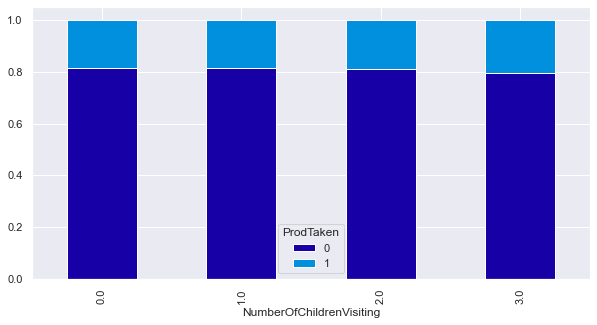

In [78]:
stacked_plot(data["NumberOfChildrenVisiting"])

- There is no discernible difference in number of children travelling with customer to determine a higher take up of a package by a customer. 

### Observations on ProdTaken vs Designation

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1283  549  1832
Manager         1513  204  1717
Senior Manager   618  124   742
VP               210   20   230
All             3946  917  4863
------------------------------------------------------------------------------------------------------------------------


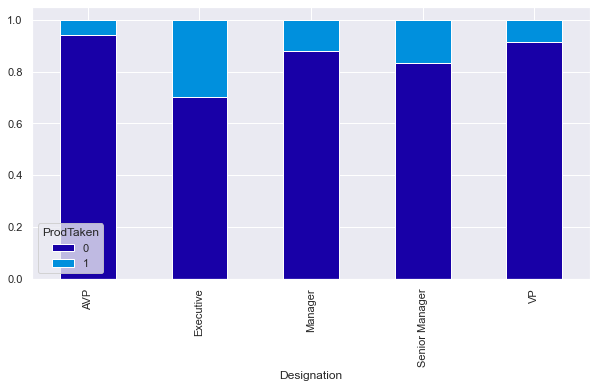

In [79]:
stacked_plot(data["Designation"])

- Executives are much more likely to take up a package.

## Build customer profile
All who took the different packages are filtered here.

In [80]:
dataProdTaken = data.loc[data["ProdTaken"] == 1]

In [81]:
dataProdTaken.shape

(917, 19)

In [82]:
dataProdTaken.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
14,1,28.0,Self Enquiry,1,30.0,Salaried,Male,2,4.0,Basic,3.0,Single,6.0,1,2,0,0.0,Executive,17028.0
21,1,36.0,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
24,1,34.0,Self Enquiry,1,12.0,Small Business,Male,2,3.0,Basic,5.0,Single,3.0,0,2,1,1.0,Executive,17960.0


In [83]:
np.random.seed(42)  # To get the same random results every time
dataProdTaken.sample(n=5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3725,1,36.0,Self Enquiry,3,34.0,Salaried,Male,3,4.0,Deluxe,3.0,Single,3.0,1,5,0,1.0,Manager,24491.0
204,1,38.0,Self Enquiry,1,35.0,Small Business,Male,3,3.0,Deluxe,5.0,Divorced,1.0,1,3,0,1.0,Manager,21673.0
2312,1,28.0,Self Enquiry,1,18.0,Salaried,Female,3,3.0,Basic,3.0,Married,2.0,1,4,1,1.0,Executive,17515.0
2948,1,46.0,Company Invited,3,33.0,Salaried,Female,4,4.0,Deluxe,5.0,Divorced,4.0,0,2,0,1.0,Manager,22964.0
4620,1,41.0,Company Invited,3,31.0,Salaried,Female,4,2.0,Super Deluxe,4.0,Single,6.0,1,3,1,1.0,AVP,31872.0


In [84]:
dataProdTaken.tail()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Single,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Single,3.0,1,3,1,2.0,Executive,24041.0


### Observations on ProductPitched vs Numeric Values

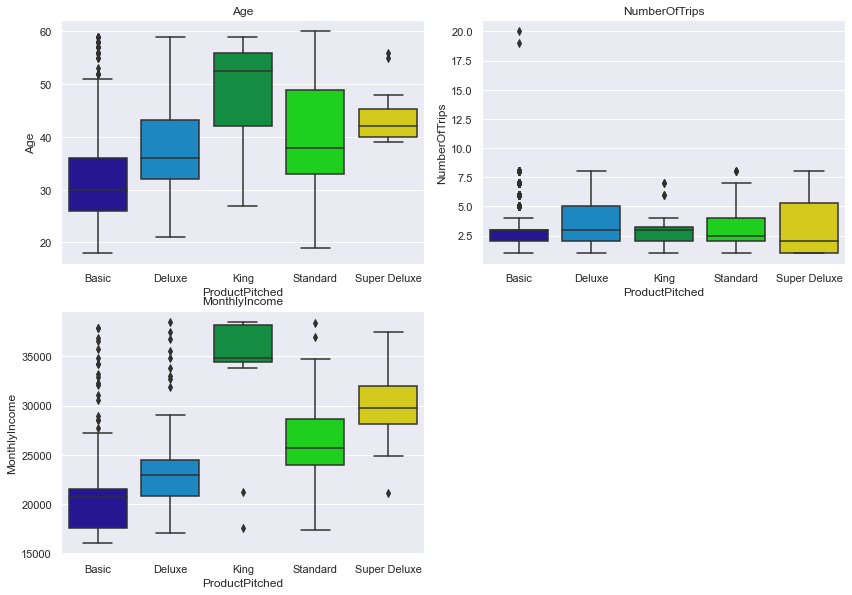

In [85]:
cols = dataProdTaken[['Age','NumberOfTrips','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(12,12))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(dataProdTaken["ProductPitched"],dataProdTaken[variable])#,palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- Basic packages are mainly taken by the younger groups from late 20s to late 30s.
- Deluxe package takers mainly age range from early 30s to early 40s.
- Standard package takers mainly age range from mid 30s to late 40s.
- Super Deluxe package takers mainly age range from early 40s to mid 40s.
- King package takers mainly age range from early 40s to mid 50s.

- Basic package takers mainly travel between 2 to 3 times a year with several outliers. 
- Deluxe package takers mainly travel between 2 to 5 times a year. 
- King package takers mainly travel between 2 to 3 times a year with some outliers.
- Standard package takers mainly travel between 2 to 4 times a year with a outlier. 
- Super Deluxe package takers travel between 1 to 5 times a year.

- Basic package takers income mostly range between 17.5K to ~ 21K.
- Deluxe package takers income mostly range between 21K to just shy of 25K.
- Standard package takers income mostly range between 24K to ~ 29K.
- Super Deluxe takers income mostly range from just below 28K to ~ 32K.
- King package takers income ranges from 35K and above.

In [86]:
dataProdTaken.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 917 non-null    category
 1   Age                       917 non-null    float64 
 2   TypeofContact             917 non-null    category
 3   CityTier                  917 non-null    category
 4   DurationOfPitch           917 non-null    float64 
 5   Occupation                917 non-null    category
 6   Gender                    917 non-null    category
 7   NumberOfPersonVisiting    917 non-null    category
 8   NumberOfFollowups         917 non-null    category
 9   ProductPitched            917 non-null    category
 10  PreferredPropertyStar     917 non-null    category
 11  MaritalStatus             917 non-null    category
 12  NumberOfTrips             917 non-null    float64 
 13  Passport                  917 non-null    categor

### Observations on ProductPitched vs CityTier

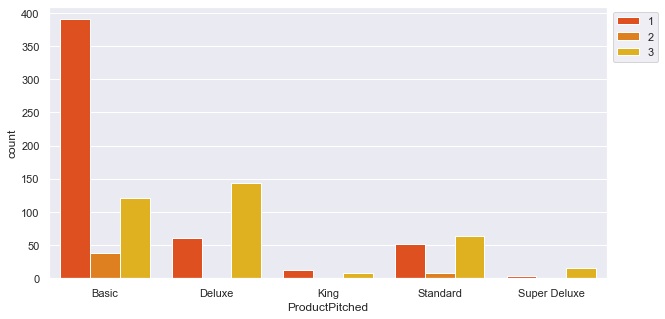

In [87]:
plt.figure(figsize=(10,5))
sns.countplot(dataProdTaken["ProductPitched"],hue=dataProdTaken["CityTier"],palette='autumn')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Basic packages are most favored by Tier 1 city residents.
- Deluxe packages are most favored by Tier 3 followed by Tier 1 city residents.
- Standard to King packages are most favored by Tier 1 and 3 city residents.

### Observations on ProductPitched vs Occupation

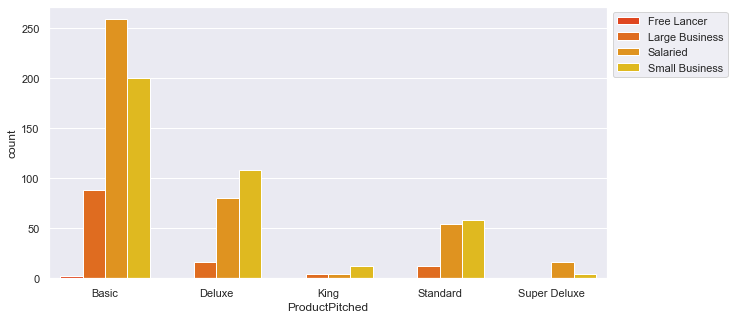

In [88]:
plt.figure(figsize=(10,5))
sns.countplot(dataProdTaken["ProductPitched"],hue=dataProdTaken["Occupation"],palette='autumn')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Basic packages are most favored by salaried people then small business.
- Deluxe packages are most favored by small business then salaried people.
- Standard packages are most favored by both salaried people and small business almost equally.
- Super Deluxe packages are picked up most by salaried people.
- King packages are picked up most by small business.

### Observations on ProductPitched vs Gender

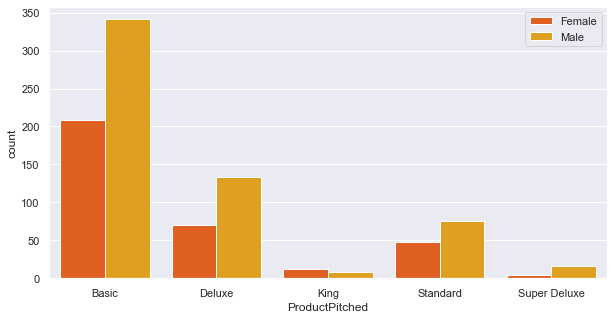

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(dataProdTaken["ProductPitched"],hue=dataProdTaken["Gender"],palette='autumn')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Basic packages are more favored by males but remains the most popular among genders.
- Deluxe packages are more favored by males but remains 2nd most popular among genders.
- Standard packages are more favored by males.
- Super Deluxe packages are picked up more by males.
- King packages are picked slightly more by females.

### Observations on ProductPitched vs NumberOfPersonVisiting

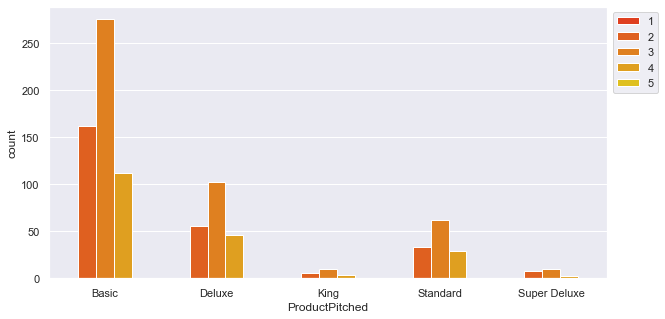

In [90]:
plt.figure(figsize=(10,5))
sns.countplot(dataProdTaken["ProductPitched"],hue=dataProdTaken["NumberOfPersonVisiting"],palette='autumn')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Basic, Deluxe and Standard packages are picked up by customers with 2 to 4 travelling companions with 3 being the most popular.
- Super Deluxe and King packages mainly attract 2 or 3 companions groups of customers.

### Observations on ProductPitched vs PreferredPropertyStar

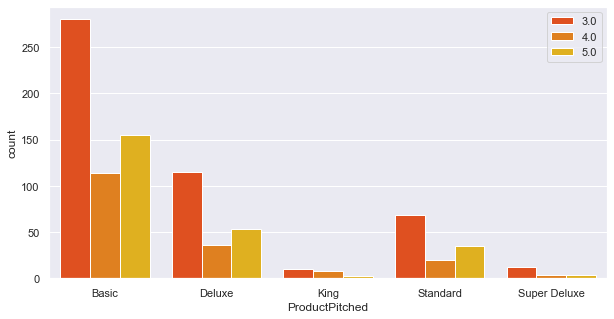

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(dataProdTaken["ProductPitched"],hue=dataProdTaken["PreferredPropertyStar"],palette='autumn')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Across Basic, Deluxe and Standard packages, most customers who took up packages preferred 3 star hotels followed by 5 stars.
- In Super Deluxe and King packages, customers who took up packages tend to prefer 3-4 stars hotels.

### Observations on ProductPitched vs MaritalStatus

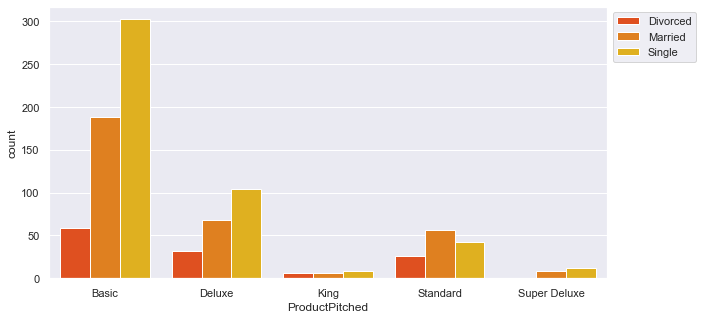

In [92]:
plt.figure(figsize=(10,5))
sns.countplot(dataProdTaken["ProductPitched"],hue=dataProdTaken["MaritalStatus"],palette='autumn')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Basic, Deluxe packages appealed most to Single customers who took a package.
- Standard packages appealed most to married customers.
- Super Deluxe and King packages appealed to the same amount of each type of customer except no divorcees picked up a Super Deluxe package.

### Observations on ProductPitched vs Passport

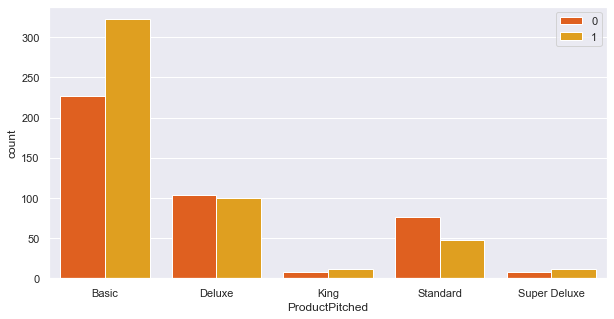

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(dataProdTaken["ProductPitched"],hue=dataProdTaken["Passport"],palette='autumn')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Basic packages are most likely picked up by a customer with a passport.
- Standard package is more picked up by those without passport.
- Deluxe, Super Deluxe and King customers have equal numbers having or not having a passport.

### Observations on ProductPitched vs  OwnCar

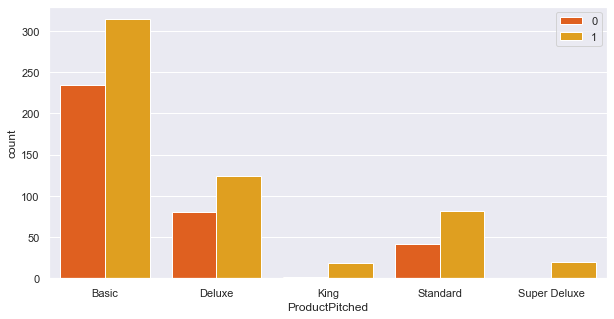

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(dataProdTaken["ProductPitched"],hue=dataProdTaken["OwnCar"],palette='autumn')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Those who own cars are more likely to pick up a package then those who don't, the disparity is more so for the Basic and King packages.

### Observations on ProductPitched vs  NumberOfChildrenVisiting

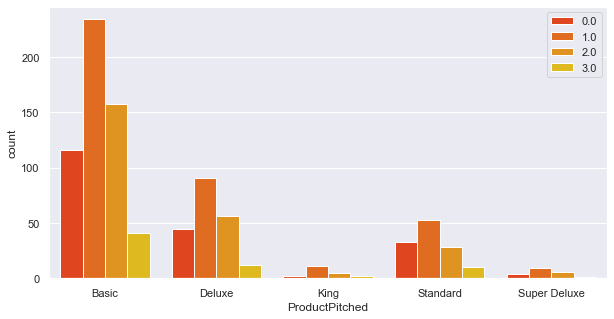

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(dataProdTaken["ProductPitched"],hue=dataProdTaken["NumberOfChildrenVisiting"],palette='autumn')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Basic, Deluxe and Super Deluxe packages are most likely picked up by customers who travels with 1-2 kids.
- Standard packages are most likely picked up by customers with 0-1 kids.
- King packages are most likely picked up by customers with 1 child.

### Observations on ProductPitched vs  Designation

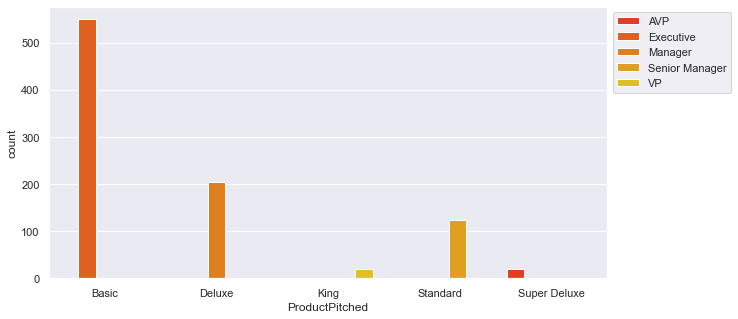

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(dataProdTaken["ProductPitched"],hue=dataProdTaken["Designation"],palette='autumn')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Basic Package attracts Executive level customers.
- Deluxe package attracts Manager level customers.
- Standard package attracts Senior Manager level customers.
- Super Deluxe and King packages are picked up by AVPs and VPs respectively.

### Customer Profiles for package types
#### Basic Package Customer Profile

- Age ranges from late 20s to 30s.
- Mainly travel between 2 to 3 times a year.
- Monthly Income mostly range from 17.5K to ~ 21K.
- Executive level designation.
- Travels with 1-2 kids.
- Much more likely to own car.
- Most likely owns a passport.
- Most likely Single.
- Preferred 3 star hotels followed by 5 stars hotels.
- With 2 to 4 travelling companions.
- More favored by Males.
- Most favored by salaried people then small business.
- Most favored by Tier 1 city residents.

#### Deluxe Package Customer Profile

- Age range from early 30s to early 40s.
- Mainly travel between 2 to 5 times a year.
- Monthly income mostly range between 21K to just shy of 25K.
- Manager level designation.
- Travels with 1-2 kids.
- Likely to own car.
- Having either a passport or none.
- Most likely Single.
- Preferred 3 star hotels followed by 5 stars hotels.
- With 2 to 4 travelling companions.
- More favored by Males.
- Most favored by small business then salaried people.
- Most favored by Tier 3 followed by Tier 1 city residents.

#### Standard Package Customer Profile

- Age range from mid 30s to late 40s.
- Mainly travel between 2 to 4 times a year.
- Monthly income mostly range between 24K to ~ 29K.
- Senior Manager level designation.
- Travels with 0-1 kids.
- Likely to own car.
- More likely not owning a passport.
- More likely Married.
- Preferred 3 star hotels followed by 5 stars hotels.
- With 2 to 4 travelling companions.
- More favored by Males.
- Favored by both salaried people and small business almost equally.
- Most favored by Tier 1 and 3 city residents.

#### Super Deluxe Package Customer Profile

- Age range from early 40s to mid 40s.
- Travel between 1 to 5 times a year.
- Monthly income mostly range from just below 28K to ~ 32K.
- AVP level designation.
- Travels with 1-2 kids.
- Likely to own car.
- Having either a passport or none.
- Single or Married.
- Prefer 3-4 stars hotels.
- With 2 or 3 travelling companions.
- More favored by Males.
- Favored most by salaried people.
- Most favored by Tier 1 and 3 city residents.

#### King  Package Customer Profile

- Age range from early 40s to mid 50s.
- Mainly travel between 2 to 3 times a year.
- Monthly income ranges from 35K and above.
- VP level designation. 
- Travels with 1 kid.
- Likely to own car.
- Having either a passport or none.
- Single, Married or Divorced.
- Prefer 3-4 stars hotels.
- With 2 or 3 travelling companions.
- More favored by Females.
- Favored most by small business.
- Most favored by Tier 1 and 3 city residents.

## EDA Business Insights
- It has been shown that the package acceptance is largely among the customers ages 28 to 40. This has made our Basic, Standard and Deluxe packages successful based on marketing the right packages to our customer profiles.
- Tier 2 and Tier 3 city residents are more accepting of packages then Tier 1 city residents. However, Tier 2 residents only constituted of 4.07% of our customer pool. More expansion is needed among Tier 2 residents as well as Tier 3 customer base now at 30.68% only.
- Large Business were also found to be more accepting of packages but only constituted 8.9% of our customer base. More expansion is needed on Large business customers.
- Higher number of followups by our sales teams to the potential customers lead to greater success of the customer accepting a package. This is so for 3 followups and above with each successive followup leading to a greater acceptance level. Sales teams should be briefed to at least have 3 followups with potential customers.
- Basic followed by Standard and Deluxe packages have the most success rates among our customers. The new Wellness package has to have similar features to them and marketed in 3 star or 5 star hotel combinations. This is because although most customers of Basic,Standard or Premium packages preferred 3 star, a number of them also picked 5 star over 4 star within these packages. 5 star preferred customers are also more accepting of a package.
- Singles are much more likely then married or divorcees to take up packages but our current customer base only has 32.8% of singles vs 47.8% married. Perhaps a marketing campaign to attract singles to be our customers can be done.
- Passport holders are much more likely to accept a package than none passport holders but 70.8% of our current customer base do not have passports. Incentives can be launched to attract passport holders to be our customers or encourage our current customers to make a passport.
- Customer rating of Pitch satisfaction score of 3.0 and above are more likely to accept a package. However numbers show that ratings 1.0 is as high as ratings 4.0 as well as 5.0. This has to be further investigated on why the sales team gets such an unusual higher number of rating 1.0 to help improve sales conversion.
- Analysis has shown that least acceptance rate among packages is the Super Deluxe package which ties in with its customer profile of people designated as AVPs. AVPs number the least likely to accept a package and Super Deluxe was marketed at them. The package therefore needs a relook and if needed, it can be discontinued. The new Wellness package should not have features similar to the Super Deluxe package. 

# Data Pre-Processing

## Missing Values

In [97]:
data.isnull().values.any() # If there are any null or missing values in data set; 

False

***Observations***
- Missing values have been rectififed earlier.

## Duplicate Values

In [98]:
data[data.duplicated()].count() # Find out duplicates in the data set

ProdTaken                   141
Age                         141
TypeofContact               141
CityTier                    141
DurationOfPitch             141
Occupation                  141
Gender                      141
NumberOfPersonVisiting      141
NumberOfFollowups           141
ProductPitched              141
PreferredPropertyStar       141
MaritalStatus               141
NumberOfTrips               141
Passport                    141
PitchSatisfactionScore      141
OwnCar                      141
NumberOfChildrenVisiting    141
Designation                 141
MonthlyIncome               141
dtype: int64

***Observations***
- Previously duplicates were not found prior to dropping customer ID, however the duplicate numbers across all columns is too uncanny to ignore.

In [99]:
data.drop_duplicates(inplace=True)

In [100]:
data[data.duplicated()].count() # Find out duplicates in the data set

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

***Observations***
- Duplicate values have been rectififed. Impact is not more than 3% of dataset.

## Treating Outliers

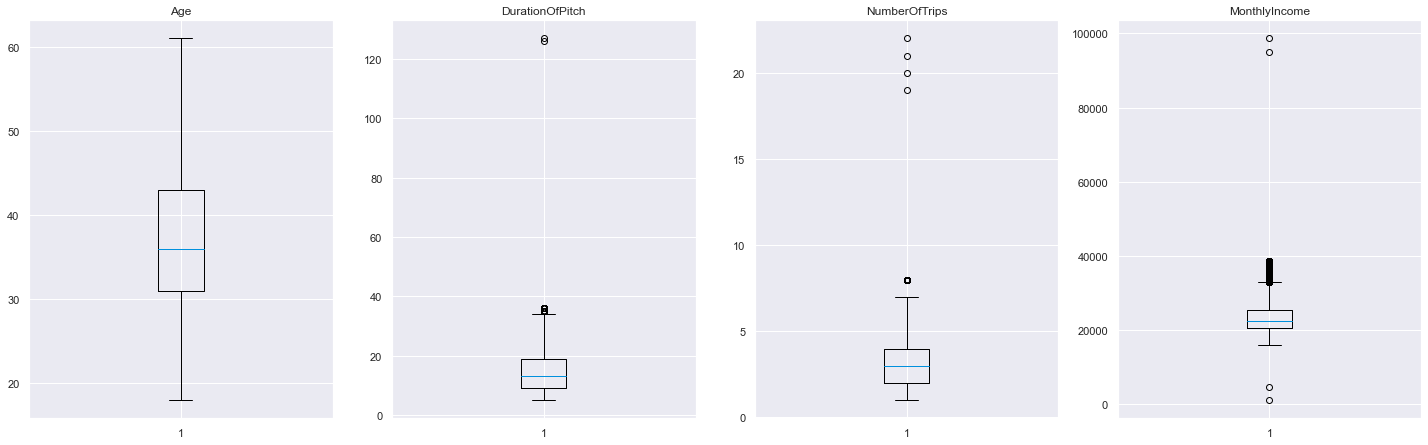

In [101]:
# Listing all mumerical value boxplots
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

***Observations***
- Several variables have outliers that need treatment.

In [102]:
# Lets treat outliers by flooring and capping
def treat_outliers(dataf,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    dataf: data frame
    col: name of the column
    '''
    Q1=dataf[col].quantile(0.25) # 25th quantile
    Q3=dataf[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    dataf[col] = np.clip(dataf[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return dataf

def treat_outliers_all(dataf, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    dataf: data frame
    '''
    for c in col_list:
        dataf = treat_outliers(dataf,c)
        
    return dataf

In [103]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data,numerical_col)

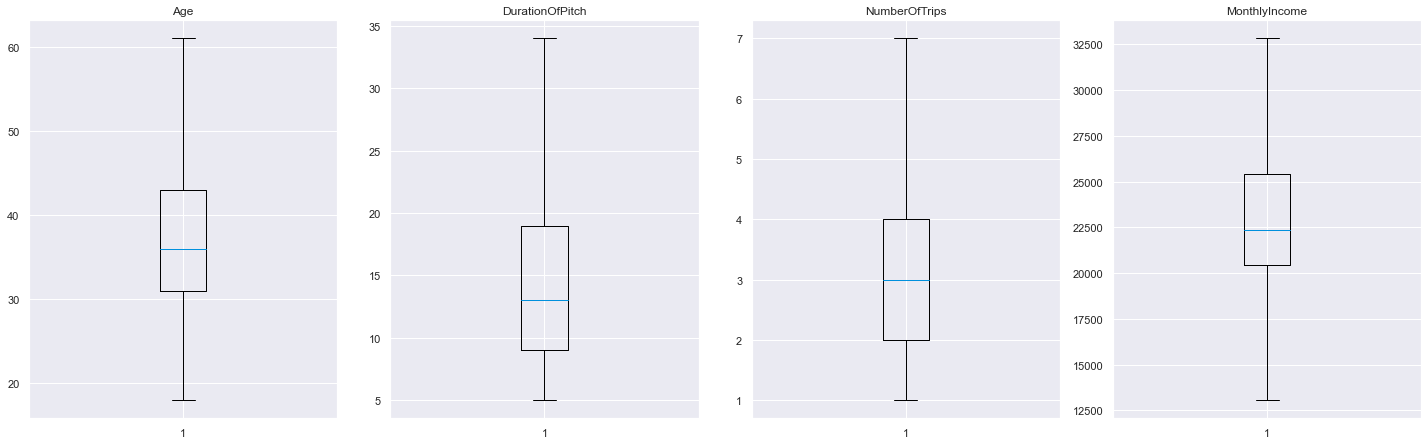

In [104]:
# Listing all mumerical value boxplots
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

***Observations***
- Outliers are treated.

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4722 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4722 non-null   category
 1   Age                       4722 non-null   float64 
 2   TypeofContact             4722 non-null   category
 3   CityTier                  4722 non-null   category
 4   DurationOfPitch           4722 non-null   float64 
 5   Occupation                4722 non-null   category
 6   Gender                    4722 non-null   category
 7   NumberOfPersonVisiting    4722 non-null   category
 8   NumberOfFollowups         4722 non-null   category
 9   ProductPitched            4722 non-null   category
 10  PreferredPropertyStar     4722 non-null   category
 11  MaritalStatus             4722 non-null   category
 12  NumberOfTrips             4722 non-null   float64 
 13  Passport                  4722 non-null   catego

In [106]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Feature Engineering

## Age Binning

In [107]:
binned_age = pd.cut(data['Age'], [15,25,35,45,55,65])
binned_age.value_counts(dropna=False)

(25, 35]    1729
(35, 45]    1702
(45, 55]     759
(15, 25]     342
(55, 65]     190
Name: Age, dtype: int64

In [108]:
# can add custom labels
data['Age_bin'] = pd.cut(
    data['Age'], [15,25,35,45,55,65], 
    labels = ["15-25" , "25-35" , "35-45" , "45-55" , "55-65"]
)
data.drop(['Age'], axis=1, inplace=True)
data['Age_bin'].value_counts(dropna=False)

25-35    1729
35-45    1702
45-55     759
15-25     342
55-65     190
Name: Age_bin, dtype: int64

In [109]:
data.head()

,ProdTaken,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_bin
0,1,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,35-45
1,0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,45-55
2,1,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,35-45
3,0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,25-35
4,0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,35-45


In [110]:
data["Age_bin"] = data["Age_bin"].astype("category")

***Observations***
- Age has been put into age groups in Age_bin and converted to categorical variable.

## Income Binning

In [111]:
binned_income = pd.cut(data['MonthlyIncome'], [10000.0,20000.0,30000.0,40000.0])
binned_income.value_counts(dropna=False)

(20000.0, 30000.0]    3136
(10000.0, 20000.0]    1016
(30000.0, 40000.0]     570
Name: MonthlyIncome, dtype: int64

In [112]:
# can add custom labels
data['Income_bin'] = pd.cut(
    data['MonthlyIncome'], [10000.0,20000.0,30000.0,40000.0], 
    labels = ["10k-20k" , "20k-30k" , "30k-40k"]
)
data.drop(['MonthlyIncome'], axis=1, inplace=True)
data['Income_bin'].value_counts(dropna=False)

20k-30k    3136
10k-20k    1016
30k-40k     570
Name: Income_bin, dtype: int64

In [113]:
data.head()

,ProdTaken,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,Age_bin,Income_bin
0,1,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,35-45,20k-30k
1,0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,45-55,20k-30k
2,1,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,35-45,10k-20k
3,0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,25-35,10k-20k
4,0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,35-45,10k-20k


In [114]:
data["Income_bin"] = data["Income_bin"].astype("category")

***Observations***
- MonthlyIncome has been put into income groups in Income_bin and converted to categorical variable.

## Check variable datatypes

In [115]:
data["NumberOfTrips"] = data["NumberOfTrips"].astype("int64")
data["DurationOfPitch"] = data["DurationOfPitch"].astype("int64")

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4722 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4722 non-null   category
 1   TypeofContact             4722 non-null   category
 2   CityTier                  4722 non-null   category
 3   DurationOfPitch           4722 non-null   int64   
 4   Occupation                4722 non-null   category
 5   Gender                    4722 non-null   category
 6   NumberOfPersonVisiting    4722 non-null   category
 7   NumberOfFollowups         4722 non-null   category
 8   ProductPitched            4722 non-null   category
 9   PreferredPropertyStar     4722 non-null   category
 10  MaritalStatus             4722 non-null   category
 11  NumberOfTrips             4722 non-null   int64   
 12  Passport                  4722 non-null   category
 13  PitchSatisfactionScore    4722 non-null   catego

# Modelling Data Preparation, Definition & Evaluation Criteria
## Split the data into train and test sets

In [117]:
Y = data["ProdTaken"]
X = data.drop("ProdTaken" , axis=1)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
# X = pd.get_dummies(X,columns=['Family','Education'],drop_first=True)


# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42, stratify=Y)
# stratify=Y maintains the ratio of default vs non default in the target variable for both training and testing sets)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3305, 45) (1417, 45) (3305,) (1417,)


In [118]:
Y.value_counts(1) # test the ratio of 1s to 0s

0    0.811309
1    0.188691
Name: ProdTaken, dtype: float64

In [119]:
y_test.value_counts(1) # test the ratio of 1s to 0s

0    0.811574
1    0.188426
Name: ProdTaken, dtype: float64

In [120]:
y_train.value_counts(1) # test the ratio of 1s to 0s

0    0.811195
1    0.188805
Name: ProdTaken, dtype: float64

## Metrics & Functions Definitions

In [121]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [122]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1 of the model
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("f1 score on training set : ",metrics.f1_score(y_train,pred_train))
        print("f1 score on test set : ",metrics.f1_score(y_test,pred_test))
        #print('f1 score on train data:',f1_score(y_train, pred_train))
        #print('f1 score on test data:',f1_score(y_test, pred_test))
    
    return score_list # returning the list with train and test scores

## Model Evaluation Criterion

### Model can make wrong predictions as:
1. False Positive: Predicting a customer is a travel package convertable but actually not convertable.
2. False Negative: Predicting a customer is a travel package non-convertable but actually convertable.

### Which case is more important? 
* Both the cases are important as:

* If we predict a customer is a travel package convertable but actually not convertable then a wrong person will be getting the targeted marketing effort wasting resources.

* If we predict a customer is a travel package non-convertable but actually convertable, that person will not be able to receive targeted marketing effort and hence may not be aware of the travel package and thus a loss of business.

### How to reduce losses?
* We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.
*  Therefore, `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

# Model building - Bagging, Random Forest & Decision Tree
## Build Decision Tree Model
- We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
- If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.
- In this case, we can pass a dictionary {0:0.19,1:0.81} to the model to specify the weight of each class and the decision tree will give more weightage to class 1 based on the dataset distribution.
- class_weight is a hyperparameter for the decision tree classifier.

In [123]:
dtree = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=42)

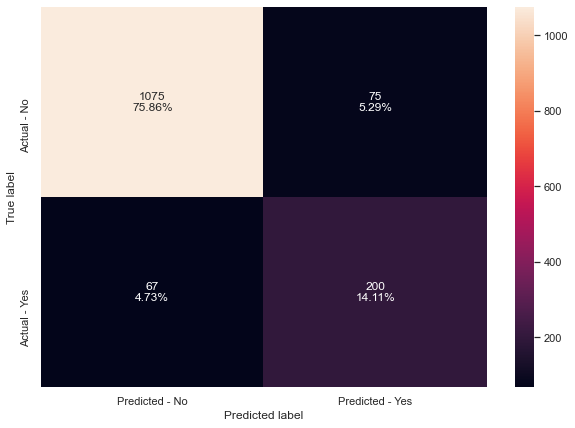

In [124]:
make_confusion_matrix(dtree,y_test)

**Confusion Matrix -**
* Customer takes up package and the model predicted customer takes up package :  True Positive (observed=1,predicted=1)
* Customer didn't take up package and the model predicted customer takes up package : False Positive (observed=0,predicted=1)
* Customer didn't take up package and the model predicted customer didn't take up package : True Negative (observed=0,predicted=0)
* Customer takes up package and the model predicted customer didn't take up package : False Negative (observed=1,predicted=0)

In [125]:
#Using above defined function to get accuracy, recall, precision and f1 score on train and test set
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.899788285109386
Recall on training set :  1.0
Recall on test set :  0.7490636704119851
Precision on training set :  1.0
Precision on test set :  0.7272727272727273
f1 score on training set :  1.0
f1 score on test set :  0.7380073800738007


**Observations**
- Decision tree is working well on the training data but is not able to generalize well on the test data. 
- This is so as well for the f1 score (train data: 100% ; test data: 73.8%). 
- In fact this is a sign of overfitting.

## Build Bagging Classifier Model

In [126]:
#base_estimator for bagging classifier is a decision tree by default
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1),random_state=42)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=42)

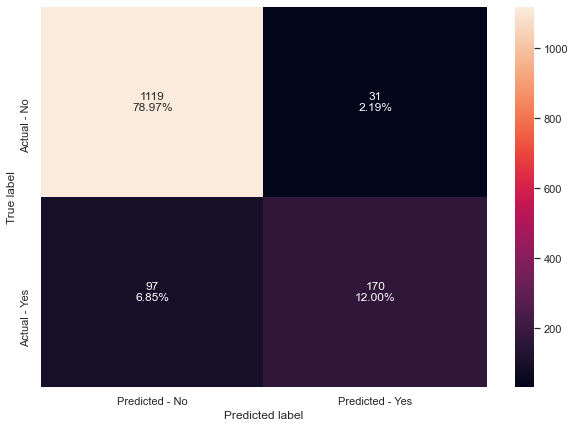

In [127]:
make_confusion_matrix(bagging,y_test)

In [128]:
bagging_score=get_metrics_score(bagging)

Accuracy on training set :  0.9957639939485627
Accuracy on test set :  0.9096683133380381
Recall on training set :  0.9775641025641025
Recall on test set :  0.6367041198501873
Precision on training set :  1.0
Precision on test set :  0.845771144278607
f1 score on training set :  0.9886547811993517
f1 score on test set :  0.7264957264957265


**Observations**
- Bagging classifier is still overfitting on the training set and is not generalizing well on the test data. 
- This is so as well for the f1 score (train data: 98.9% ; test data: 72.6%). 
- It is a slight improvement over the initial lone decision tree where the scores gap between train and test data is smaller.

## Build Bagging Classifier Model - Logistic Regression as base estimator

In [129]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(class_weight={0:0.19,1:0.81},random_state=1, max_iter=1000),random_state=42)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(class_weight={0: 0.19,
                                                                  1: 0.81},
                                                    max_iter=1000,
                                                    random_state=1),
                  random_state=42)

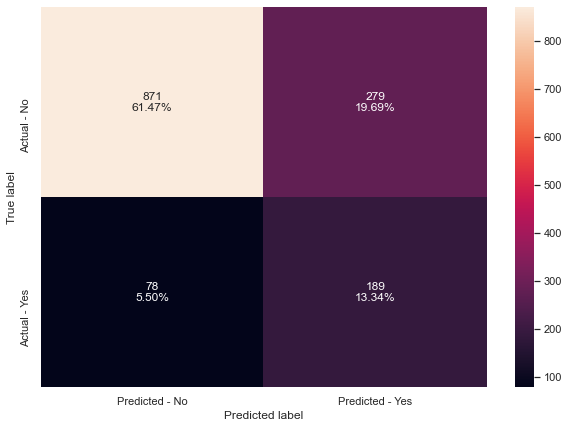

In [130]:
make_confusion_matrix(bagging_lr,y_test)

In [131]:
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.7655068078668684
Accuracy on test set :  0.748059280169372
Recall on training set :  0.7419871794871795
Recall on test set :  0.7078651685393258
Precision on training set :  0.4298978644382544
Precision on test set :  0.40384615384615385
f1 score on training set :  0.5443856554967665
f1 score on test set :  0.5142857142857142


**Observations**
- Bagging classifier with logistic regression as base_estimator is not overfitting the data but the scores are low.
- This is so as well for the f1 score (train data: 54.4% ; test data: 51.4%).
- Ensemble models are less interpretable than decision tree but bagging classifier is even less interpretable than random forest. It does not even have a feature importance attribute.

## Build Random Forest Model

In [132]:
rf = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=42)

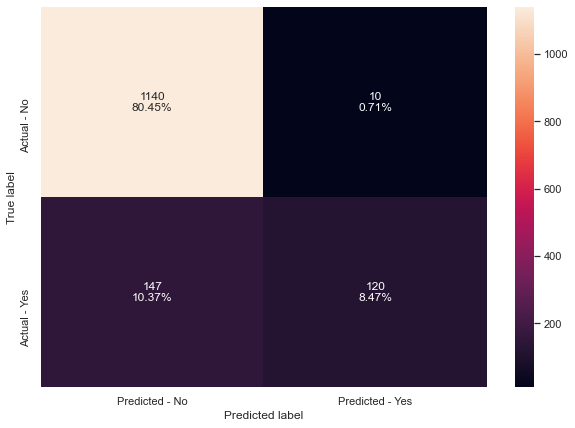

In [133]:
make_confusion_matrix(rf,y_test)

In [134]:
rf_score=get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.8892025405786874
Recall on training set :  1.0
Recall on test set :  0.449438202247191
Precision on training set :  1.0
Precision on test set :  0.9230769230769231
f1 score on training set :  1.0
f1 score on test set :  0.6045340050377833


**Observations**
- Random Forest classifier is still overfitting on the training set and is not generalizing well on the test data. 
- This is so as well for the f1 score (train data: 100% ; test data: 60.5%). 
- It does not do as well as the lone decision tree or the bagging classifier.

## Hyperparameter Tuning

### Decision Tree

In [135]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=42)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score) # using highest f1_score to choose 

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=6,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=42)

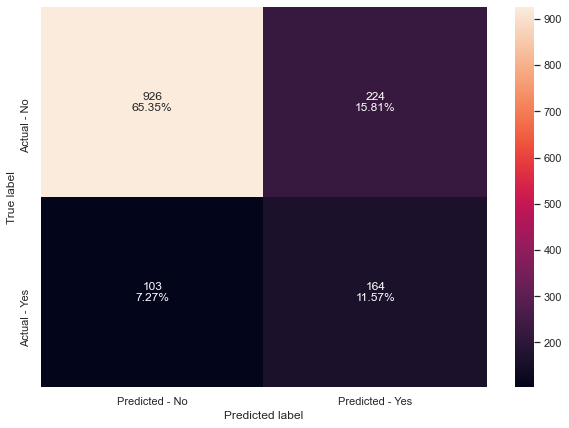

In [136]:
make_confusion_matrix(dtree_estimator,y_test)

In [137]:
dtree_estimator_score=get_metrics_score(dtree_estimator)

Accuracy on training set :  0.7963691376701967
Accuracy on test set :  0.7692307692307693
Recall on training set :  0.7115384615384616
Recall on test set :  0.6142322097378277
Precision on training set :  0.47385272145144075
Precision on test set :  0.422680412371134
f1 score on training set :  0.5688661114670083
f1 score on test set :  0.5007633587786259


**Observations**
- Overfitting in decision tree tuned has reduced but scores have also reduced.
- This is so as well for the f1 score (train data: 56.9% ; test data: 50.1%).

### Bagging Classifier
**Some of the important hyperparameters available for bagging classifier are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [138]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1),random_state=42)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score) # using highest f1_score to choose

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=42)

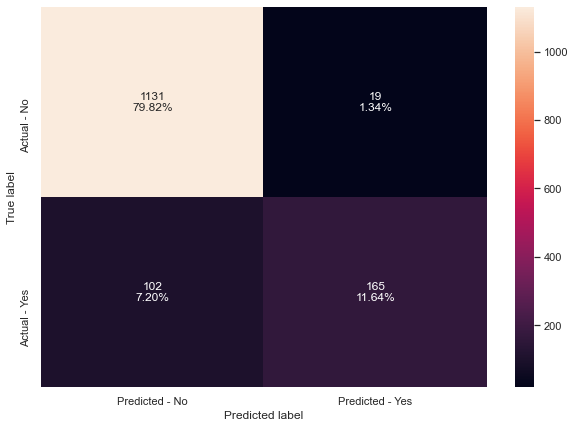

In [139]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

In [140]:
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9993948562783661
Accuracy on test set :  0.9146083274523642
Recall on training set :  0.9967948717948718
Recall on test set :  0.6179775280898876
Precision on training set :  1.0
Precision on test set :  0.8967391304347826
f1 score on training set :  0.9983948635634029
f1 score on test set :  0.7317073170731706


**Observations**
- Bagging classifier  tuned is still overfitting but less so on the training set and is generalizing a little better on the test data for precision. 
- f1 score's score gap between training and test set remains (train data: 99.8% ; test data: 73.2%). 
- There is no improvement on other scores but precision score gap between training and test set is smaller by 5% points.

### Bagging Classifier - Logistic Regression as base estimator

In [141]:
#bagging_lr_tuned=BaggingClassifier(base_estimator=LogisticRegression(class_weight={0:0.19,1:0.81},random_state=1, max_iter=1000),random_state=42)
#bagging_lr.fit(X_train,y_train)

# Choose the type of classifier. 
bagging_lr_tuned = BaggingClassifier(base_estimator=LogisticRegression(class_weight={0:0.19,1:0.81},random_state=1, max_iter=1000),random_state=42)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score) # using highest f1_score to choose

# Run the grid search
grid_obj = GridSearchCV(bagging_lr_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_lr_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_lr_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(class_weight={0: 0.19,
                                                                  1: 0.81},
                                                    max_iter=1000,
                                                    random_state=1),
                  max_features=0.9, max_samples=0.9, n_estimators=20,
                  random_state=42)

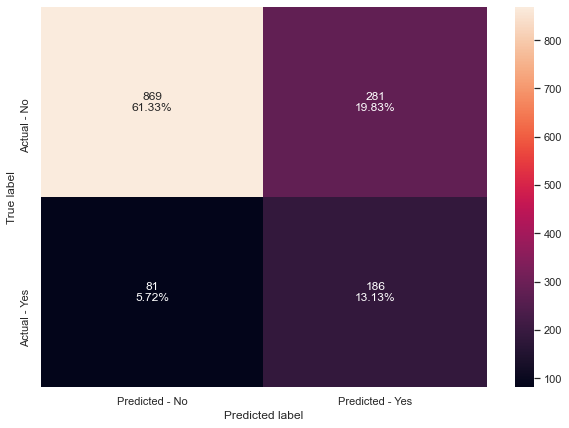

In [142]:
make_confusion_matrix(bagging_lr_tuned,y_test)

In [143]:
bagging_lr_tuned_score=get_metrics_score(bagging_lr_tuned)

Accuracy on training set :  0.7679273827534039
Accuracy on test set :  0.744530698659139
Recall on training set :  0.7435897435897436
Recall on test set :  0.6966292134831461
Precision on training set :  0.4332399626517274
Precision on test set :  0.39828693790149894
f1 score on training set :  0.5474926253687316
f1 score on test set :  0.5068119891008175


**Observations**
- Bagging classifier tuned with logistic regression as base_estimator is not overfitting the data but the scores performed similarly low to before tuning.
- This is so as well for the f1 score (train data: 54.7% ; test data: 50.7%).

### Random Forest Classifier
**Now, let's see if we can get a better model by tuning the random forest classifier. Some of the important hyperparameters available for random forest classifier are:**

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune  Random Forest like max_depth, min_sample_split etc.

In [146]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=42)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [50,100,150],
        "min_samples_leaf": np.arange(5, 10),
        "max_features": np.arange(0.2, 0.7, 0.1),
        "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score) # using highest f1_score to choose

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81},
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=50, random_state=42)

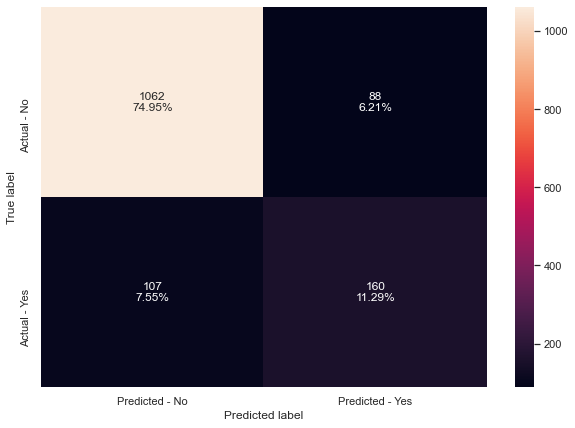

In [147]:
make_confusion_matrix(rf_estimator_tuned,y_test)

In [148]:
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9282904689863842
Accuracy on test set :  0.8623853211009175
Recall on training set :  0.875
Recall on test set :  0.599250936329588
Precision on training set :  0.774468085106383
Precision on test set :  0.6451612903225806
f1 score on training set :  0.8216704288939052
f1 score on test set :  0.6213592233009709


**Observations**
- Random Forest classifier tuned has improved much of the overfitting issue on the training set and is generalizing better on the test data. 
- This is so as well for the f1 score (train data: 82.2% ; test data: 62.1%), an improvement of 20% points in the score gap but the scores are low.

# Model building - Boosting & Stacking
## Checking train and test sets

In [149]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3305, 45) (1417, 45) (3305,) (1417,)


In [150]:
Y.value_counts(1) # test the ratio of 1s to 0s

0    0.811309
1    0.188691
Name: ProdTaken, dtype: float64

In [151]:
y_test.value_counts(1) # test the ratio of 1s to 0s

0    0.811574
1    0.188426
Name: ProdTaken, dtype: float64

In [152]:
y_train.value_counts(1) # test the ratio of 1s to 0s

0    0.811195
1    0.188805
Name: ProdTaken, dtype: float64

## Build AdaBoost Classifier Model

Accuracy on training set :  0.848411497730711
Accuracy on test set :  0.8327452364149612
Recall on training set :  0.36538461538461536
Recall on test set :  0.3146067415730337
Precision on training set :  0.6846846846846847
Precision on test set :  0.6086956521739131
f1 score on training set :  0.47648902821316613
f1 score on test set :  0.4148148148148148


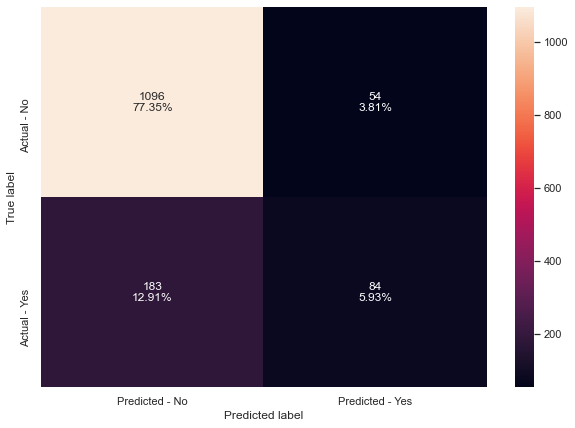

In [153]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=42)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

**Observations**
- Adaboost is giving more generalized performance than previous models but the test f1-score is too low.
- F1 score is at (train data: 47.6% ; test data: 41.5%).

### Hyperparameter Tuning

In [154]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100, random_state=42)

Accuracy on training set :  0.9721633888048411
Accuracy on test set :  0.8673253352152435
Recall on training set :  0.8894230769230769
Recall on test set :  0.5430711610486891
Precision on training set :  0.9602076124567474
Precision on test set :  0.6872037914691943
f1 score on training set :  0.9234608985024958
f1 score on test set :  0.6066945606694562


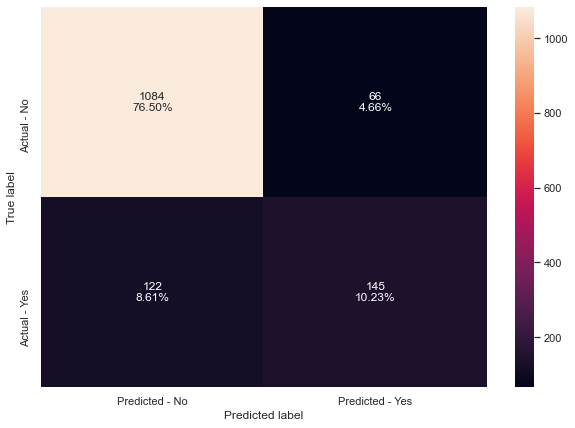

In [155]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

**Observations**
- The tuned AdaBoost model performance has increased but the model has started to overfit the training data among several metrics.
- F1 score is at (train data: 92.3% ; test data: 60.7%).

## Build Gradient Boosting Classifier Model

Accuracy on training set :  0.8886535552193646
Accuracy on test set :  0.8567395906845449
Recall on training set :  0.5
Recall on test set :  0.38202247191011235
Precision on training set :  0.8478260869565217
Precision on test set :  0.7285714285714285
f1 score on training set :  0.6290322580645161
f1 score on test set :  0.5012285012285013


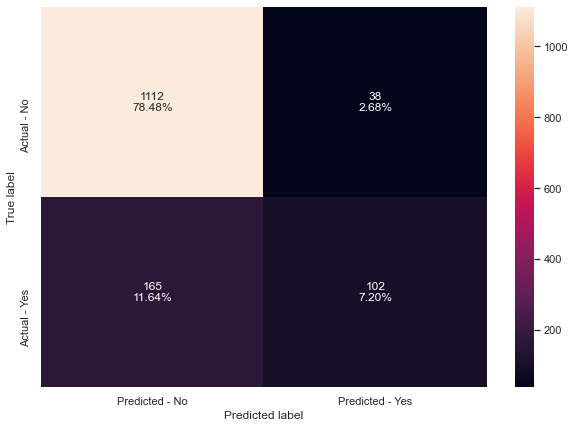

In [156]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

**Observations**
- The Gradient Boosting model does not overfit as much but some of the test data metrics are low.
- F1 score is at (train data: 62.9% ; test data: 50.1%).

### Hyperparameter Tuning

In [157]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=42)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=42,
                           subsample=0.8)

Accuracy on training set :  0.9234493192133132
Accuracy on test set :  0.8729710656316161
Recall on training set :  0.655448717948718
Recall on test set :  0.47191011235955055
Precision on training set :  0.9149888143176734
Precision on test set :  0.7636363636363637
f1 score on training set :  0.7637721755368814
f1 score on test set :  0.5833333333333333


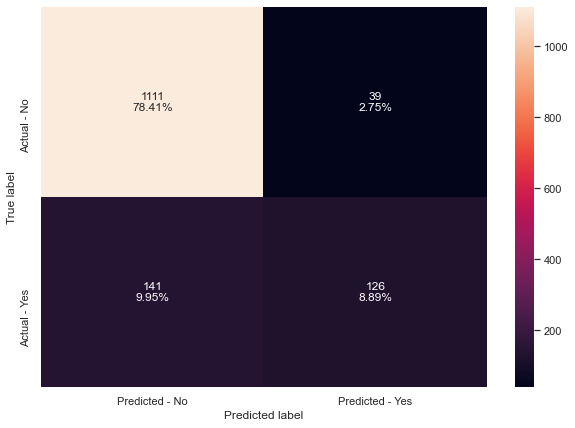

In [158]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

**Observations**
- The tuned Gradient Boosting model does not overfit yet and all test data metrics improved but there is more room for improvement.
- F1 score is at (train data: 76.4% ; test data: 58.3%).

## Build XGBoost Classifier Model

Accuracy on training set :  0.9990922844175492
Accuracy on test set :  0.9110797459421313
Recall on training set :  0.9951923076923077
Recall on test set :  0.6404494382022472
Precision on training set :  1.0
Precision on test set :  0.8507462686567164
f1 score on training set :  0.9975903614457832
f1 score on test set :  0.7307692307692307


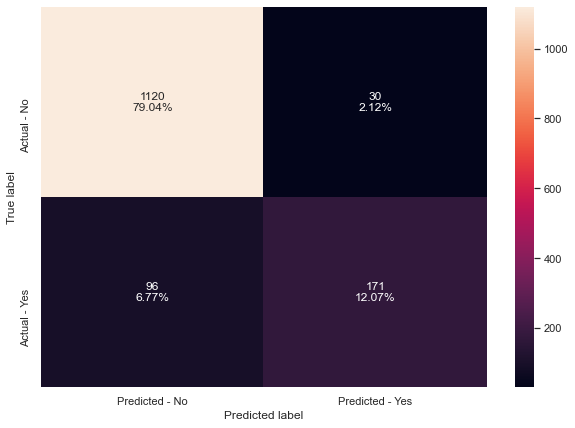

In [159]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

**Observations**
- The XGB model is starting to overfit and all test data metrics have improved significantly.
- F1 score is at (train data: 99.8% ; test data: 73.1%).

### Hyperparameter Tuning

In [160]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=42, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9712556732223904
Accuracy on test set :  0.9011997177134792
Recall on training set :  0.9951923076923077
Recall on test set :  0.7640449438202247
Precision on training set :  0.8709677419354839
Precision on test set :  0.7259786476868327
f1 score on training set :  0.9289454001495887
f1 score on test set :  0.7445255474452555


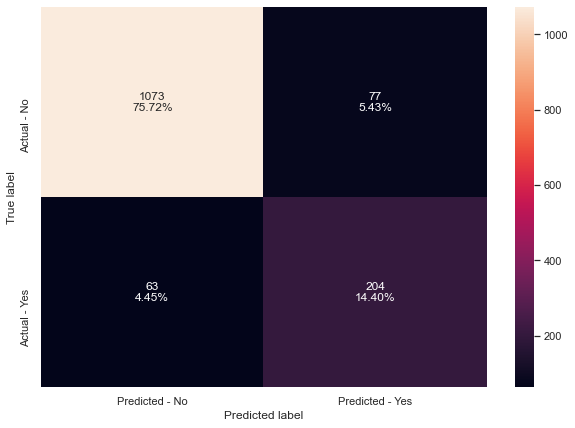

In [161]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

**Observations**
- The tuned XGB model has generalized the test data better and keeping the improved metrics scores.
- F1 score is at (train data: 92.9% ; test data: 74.5%).

## Build Stacking Classifier Model

In [162]:
estimators = [('Random Forest',rf_estimator_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_features=0.6000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=42)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                           random_state=4...
              

Accuracy on training set :  0.9288956127080181
Accuracy on test set :  0.8482709950599859
Recall on training set :  0.9423076923076923
Recall on test set :  0.7378277153558053
Precision on training set :  0.747141041931385
Precision on test set :  0.5760233918128655
f1 score on training set :  0.8334514528703048
f1 score on test set :  0.6469622331691297


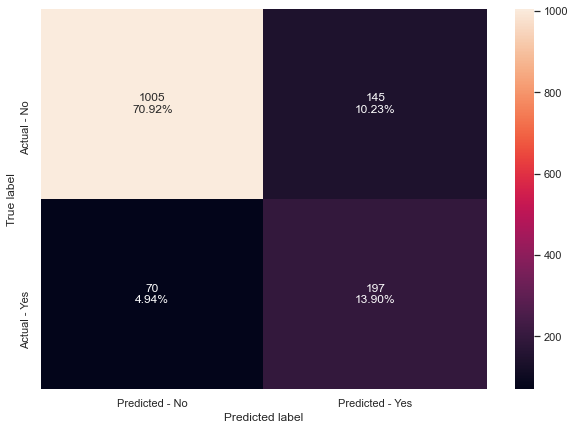

In [163]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

**Observations**
- The stacker classifier has generalized the test data similar to XGB tuned model but scored lower on the metrics.
- F1 score is at (train data: 83.3% ; test data: 64.7%).

# Comparing all models

In [165]:
# defining list of models
models = [dtree, dtree_estimator,rf, rf_estimator_tuned, bagging, bagging_estimator_tuned, bagging_lr, bagging_lr_tuned, 
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [166]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Tuned Bagging Classifier','Bagging Classifier Logistic Regression',
                                          'Tuned Bagging Classifier Logistic Regression','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
13,Tuned XGBoost Classifier,0.971256,0.901200,0.995192,0.764045,0.870968,0.725979,0.928945,0.744526
0,Decision Tree,1.000000,0.899788,1.000000,0.749064,1.000000,0.727273,1.000000,0.738007
5,Tuned Bagging Classifier,0.999395,0.914608,0.996795,0.617978,1.000000,0.896739,0.998395,0.731707
12,XGBoost Classifier,0.999092,0.911080,0.995192,0.640449,1.000000,0.850746,0.997590,0.730769
4,Bagging Classifier,0.995764,0.909668,0.977564,0.636704,1.000000,0.845771,0.988655,0.726496
14,Stacking Classifier,0.928896,0.848271,0.942308,0.737828,0.747141,0.576023,0.833451,0.646962
3,Tuned Random Forest,0.928290,0.862385,0.875000,0.599251,0.774468,0.645161,0.821670,0.621359
9,Tuned AdaBoost Classifier,0.972163,0.867325,0.889423,0.543071,0.960208,0.687204,0.923461,0.606695
2,Random Forest,1.000000,0.889203,1.000000,0.449438,1.000000,0.923077,1.000000,0.604534
11,Tuned Gradient Boosting Classifier,0.923449,0.872971,0.655449,0.471910,0.914989,0.763636,0.763772,0.583333


**Observations**
- The models are either tending towards overfitting or score poorly in terms of f1-score.
- Tuned XGBoost Classifier should be the model to press ahead as it scored the highest test f1-score.
- Tuned XGBoost Classifier has also one of the lowest gap between training and test f1-score of the dataset among all models.
- There may well be other combinations of hyperparameters not attempted yet to improve the metrics of the models. This will however require much more time to find out more comprehensively a better model.

# Feature Importance of Tuned XGBoost Model

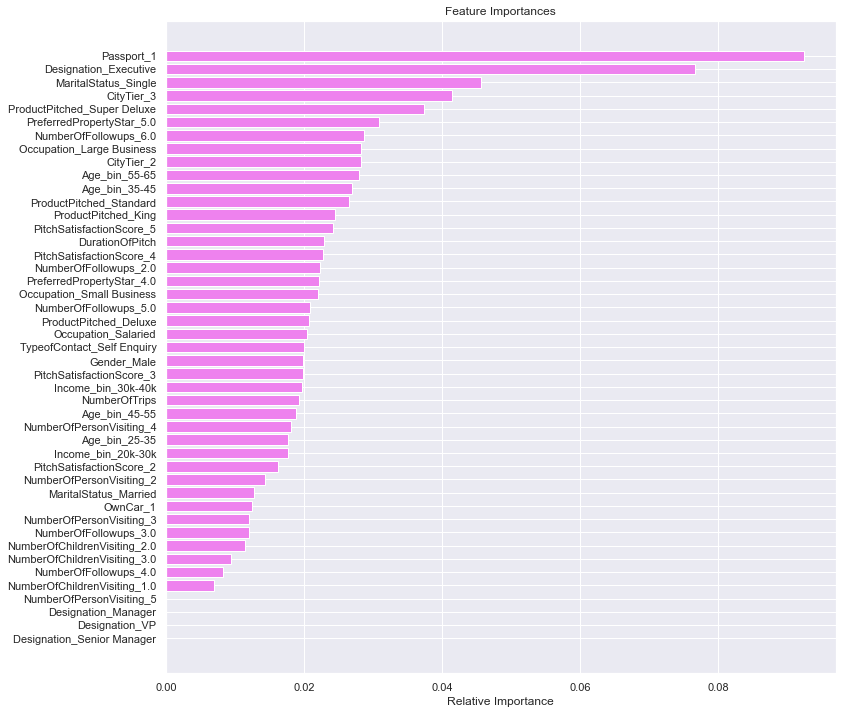

In [167]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**
- In the tuned XGBoost model, Passport(Yes) is the most important feature followed by features - Designation(Executive) and Marital Status(Single). 

# Business Insights and Recommendations
- Based on the performances of the different models, Tuned XGBoost Classifier performed the best using f1_score as the deciding factor due to the unbalanced data as well as a lower score gap between training and testing data
    - Significant variables include ‘Passport’, ‘Designation’ and ‘MaritalStatus’.
    - Coupled with EDA insights, Passport holders, Executive level and Single customers are more likely to accept a package deal.
    - However, the current customer base has 70.8% Non-Passport holders and only 32.8% of customers are single compared to 47.8% are married.
    - Therefore more targeted marketing effort at attracting Passport holders and Singles to expand the customer base with these customer segments. Incentives can also be given to encourage existing customer base to obtain a passport or attract new passport holding customers. 
    - Currently, the Executive level customers dominated the share of customers at 37.7% and more can be done to recruit them and bolster the Executive level numbers.

- Comments on additional data sources for model improvement
    - Additional data can be obtained from measured feedback of initial targeted marketing efforts to the public in order to strengthen the model.
    - Feedback can be gathered from non-package convertible customers for further analysis.
    
- Model implementation in real world and potential business benefits from model
    - The model implemented in the real world will help to raise more successful targeted marketing converts of its campaign and reduce the costs of marketing to potential non-converts or miss target marketing to potential converts. This will increase revenue and reduce both variable marketing costs and opportunity costs.
    
- Other Recommendations – From EDA
    - More expansion is needed among Tier 2 residents as well as Tier 3 customer base now at 30.68% only.
    - More expansion is needed on Large business customers now at 8.9% of our customer base.
    - Sales teams should be briefed to at least have 3 follow-ups with potential customers.
    - The new Wellness package has to have similar features to Basic, Standard and Deluxe packages and marketed in 3 star or 5 star hotel combinations.
    - Further investigation on unusual high number of rating 1.0 to help improve sales conversion.
    - Super Deluxe package performs poorly and it should require a relook at its features and discontinued it needed. The new Wellness package should not have similar features to Super Deluxe package.